<a href="https://colab.research.google.com/github/khinvi/heart-disease-fairness-analysis/blob/main/Assignment2_291J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fairness Analysis: Heart Disease Prediction**
### **Dataset & Context**
This study uses the **2020 BRFSS Heart Disease Dataset** from the CDC’s **Behavioral Risk Factor Surveillance System (BRFSS)**, which collects **400,000+ annual interviews** on health indicators across the U.S.  
Dataset: [Kaggle Link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data)  

---
### **Fairness Metrics & Sensitive Attribute**
- **Target Variable**: `HeartDisease` (Yes/No)  
- **Sensitive Attribute**: `Gender (Male/Female)`  
- **Key Fairness Metrics**:  
  - **Accuracy Parity** (equal accuracy across genders)  
  - **Demographic Parity** (equal positive outcome rates)  
  - **Equalized Odds** (similar false positive/negative rates)


In [ ]:
# Install required libraries
!pip install kagglehub pandas scikit-learn numpy --quiet

# Import required libraries
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import os
import math

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

100%|██████████| 21.4M/21.4M [00:00<00:00, 34.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [ ]:
# !pip install kagglehub pandas

In [ ]:
print("Dataset files:", os.listdir(path)) # Now you can use os.listdir()

Dataset files: ['2022', '2020']


In [ ]:
# List files inside the '2020' directory
path_2020 = os.path.join(path, "2020")
print("Files in 2020 folder:", os.listdir(path_2020))

# List files inside the '2022' directory
path_2022 = os.path.join(path, "2022")
print("Files in 2022 folder:", os.listdir(path_2022))


Files in 2020 folder: ['heart_2020_cleaned.csv']
Files in 2022 folder: ['heart_2022_with_nans.csv', 'heart_2022_no_nans.csv']


In [ ]:
print("Dataset files:", os.listdir(path))

Dataset files: ['2022', '2020']


In [ ]:
import pandas as pd

df_2020 = pd.read_csv(os.path.join(path_2020, "heart_2020_cleaned.csv"))
# df_2022 = pd.read_csv(os.path.join(path_2022, "heart_2022_cleaned.csv"))

# df_2020.head()

In [ ]:
df_2020

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
# df_2022

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df_female = df_2020[df_2020["Sex"] == "Female"]
df_male = df_2020[df_2020["Sex"] == "Male"]
df_white = df_2020[df_2020["Race"] == "White"]
df_non_white = df_2020[df_2020["Race"] != "White"]

In [ ]:
df_2020["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
# df_2020["PhysicalHealth"].unique()
# df_2020["MentalHealth"].unique()

In [ ]:
df_2020["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

# *Exploratory Data Analysis (2020 Dataset)*

# Moderate Imbalance Male vs. Female Instances

*   More Female Than Male Representation in Dataset
* ##   (167,805 Female vs 151,990 Male)







In [ ]:
df_female.count(), df_male.count()

(HeartDisease        167805
 BMI                 167805
 Smoking             167805
 AlcoholDrinking     167805
 Stroke              167805
 PhysicalHealth      167805
 MentalHealth        167805
 DiffWalking         167805
 Sex                 167805
 AgeCategory         167805
 Race                167805
 Diabetic            167805
 PhysicalActivity    167805
 GenHealth           167805
 SleepTime           167805
 Asthma              167805
 KidneyDisease       167805
 SkinCancer          167805
 dtype: int64,
 HeartDisease        151990
 BMI                 151990
 Smoking             151990
 AlcoholDrinking     151990
 Stroke              151990
 PhysicalHealth      151990
 MentalHealth        151990
 DiffWalking         151990
 Sex                 151990
 AgeCategory         151990
 Race                151990
 Diabetic            151990
 PhysicalActivity    151990
 GenHealth           151990
 SleepTime           151990
 Asthma              151990
 KidneyDisease       151990
 Skin

# Heavily Imbalanced Towards White Race instances vs, Non-White


* ##   (245,212 White vs 74,583 non-White)







In [ ]:
df_white.count(), df_non_white.count()

(HeartDisease        245212
 BMI                 245212
 Smoking             245212
 AlcoholDrinking     245212
 Stroke              245212
 PhysicalHealth      245212
 MentalHealth        245212
 DiffWalking         245212
 Sex                 245212
 AgeCategory         245212
 Race                245212
 Diabetic            245212
 PhysicalActivity    245212
 GenHealth           245212
 SleepTime           245212
 Asthma              245212
 KidneyDisease       245212
 SkinCancer          245212
 dtype: int64,
 HeartDisease        74583
 BMI                 74583
 Smoking             74583
 AlcoholDrinking     74583
 Stroke              74583
 PhysicalHealth      74583
 MentalHealth        74583
 DiffWalking         74583
 Sex                 74583
 AgeCategory         74583
 Race                74583
 Diabetic            74583
 PhysicalActivity    74583
 GenHealth           74583
 SleepTime           74583
 Asthma              74583
 KidneyDisease       74583
 SkinCancer          7

# Number of People with Each Distinct Race in Dataset


* ##   (8,069 Asian, 245,212 White, 0 Native American, 27,446 Hispanic, 22,939 Black, 10,928 Other)




In [ ]:
df_Asian= df_2020[df_2020["Race"] == "Asian"]
df_White= df_2020[df_2020["Race"] == "White"]
df_NA= df_2020[df_2020["Race"] == "'American Indian/Alaskan Native'"]
df_Hispanic= df_2020[df_2020["Race"] == "Hispanic"]
df_Black= df_2020[df_2020["Race"] == "Black"]
df_other= df_2020[df_2020["Race"] == "Other"]


In [ ]:
df_Asian.count(), df_White.count(), df_NA.count(), df_Hispanic.count(), df_Black.count(), df_other.count()

(HeartDisease        8068
 BMI                 8068
 Smoking             8068
 AlcoholDrinking     8068
 Stroke              8068
 PhysicalHealth      8068
 MentalHealth        8068
 DiffWalking         8068
 Sex                 8068
 AgeCategory         8068
 Race                8068
 Diabetic            8068
 PhysicalActivity    8068
 GenHealth           8068
 SleepTime           8068
 Asthma              8068
 KidneyDisease       8068
 SkinCancer          8068
 dtype: int64,
 HeartDisease        245212
 BMI                 245212
 Smoking             245212
 AlcoholDrinking     245212
 Stroke              245212
 PhysicalHealth      245212
 MentalHealth        245212
 DiffWalking         245212
 Sex                 245212
 AgeCategory         245212
 Race                245212
 Diabetic            245212
 PhysicalActivity    245212
 GenHealth           245212
 SleepTime           245212
 Asthma              245212
 KidneyDisease       245212
 SkinCancer          245212
 dtype: int64

# Number of People with Heart Disease in the Dataset By Race Distinction


* ##   (266 Asian, 22507 White, 0 Native American, 1443 Hispanic, 1729 Black vs 886 Other)




In [ ]:
df_Asian_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "Asian")]
df_White_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "White")]
df_NA_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "'American Indian/Alaskan Native'")]
df_Hispanic_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "Hispanic")]
df_Black_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "Black")]
df_other_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Race"] == "Other")]


In [ ]:
df_Asian_heart_disease.count(), df_White_heart_disease.count(), df_NA_heart_disease.count(), df_Hispanic_heart_disease.count(), df_Black_heart_disease.count(), df_other_heart_disease.count()

(HeartDisease        266
 BMI                 266
 Smoking             266
 AlcoholDrinking     266
 Stroke              266
 PhysicalHealth      266
 MentalHealth        266
 DiffWalking         266
 Sex                 266
 AgeCategory         266
 Race                266
 Diabetic            266
 PhysicalActivity    266
 GenHealth           266
 SleepTime           266
 Asthma              266
 KidneyDisease       266
 SkinCancer          266
 dtype: int64,
 HeartDisease        22507
 BMI                 22507
 Smoking             22507
 AlcoholDrinking     22507
 Stroke              22507
 PhysicalHealth      22507
 MentalHealth        22507
 DiffWalking         22507
 Sex                 22507
 AgeCategory         22507
 Race                22507
 Diabetic            22507
 PhysicalActivity    22507
 GenHealth           22507
 SleepTime           22507
 Asthma              22507
 KidneyDisease       22507
 SkinCancer          22507
 dtype: int64,
 HeartDisease        0
 BMI       

# Substantially More Non-Heart Disease Instances than Heart Disease Instances


* ##   (27,373 Heart Disease vs 292,422 non-Heart Disease)







In [ ]:
df_2020[df_2020['HeartDisease']=='Yes'].count(), df_2020[df_2020['HeartDisease']=='No'].count()

(HeartDisease        27373
 BMI                 27373
 Smoking             27373
 AlcoholDrinking     27373
 Stroke              27373
 PhysicalHealth      27373
 MentalHealth        27373
 DiffWalking         27373
 Sex                 27373
 AgeCategory         27373
 Race                27373
 Diabetic            27373
 PhysicalActivity    27373
 GenHealth           27373
 SleepTime           27373
 Asthma              27373
 KidneyDisease       27373
 SkinCancer          27373
 dtype: int64,
 HeartDisease        292422
 BMI                 292422
 Smoking             292422
 AlcoholDrinking     292422
 Stroke              292422
 PhysicalHealth      292422
 MentalHealth        292422
 DiffWalking         292422
 Sex                 292422
 AgeCategory         292422
 Race                292422
 Diabetic            292422
 PhysicalActivity    292422
 GenHealth           292422
 SleepTime           292422
 Asthma              292422
 KidneyDisease       292422
 SkinCancer          29

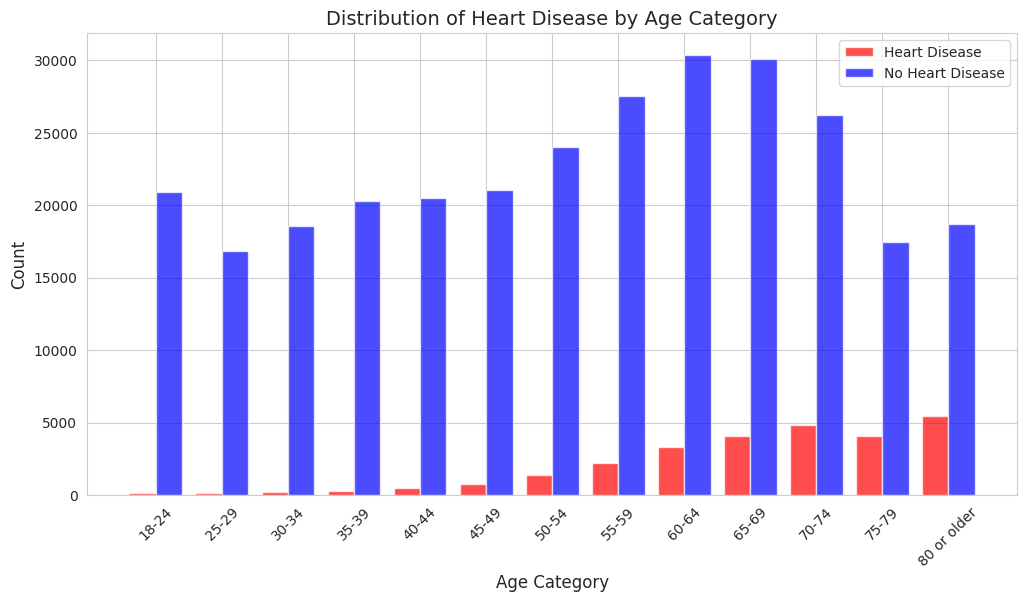

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")

# Count occurrences of heart disease cases per age category
age_heart_disease = df_2020[df_2020["HeartDisease"] == "Yes"]["AgeCategory"].value_counts().sort_index()
age_no_heart_disease = df_2020[df_2020["HeartDisease"] == "No"]["AgeCategory"].value_counts().sort_index()

# Create an array for x-axis positions
categories = age_heart_disease.index  # Get age categories in sorted order
x = np.arange(len(categories))  # Numeric positions for bars

# Bar width
width = 0.4

# Create bar plot with adjusted positions
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, age_heart_disease.values, width=width, label="Heart Disease", color="red", alpha=0.7)
plt.bar(x + width/2, age_no_heart_disease.values, width=width, label="No Heart Disease", color="blue", alpha=0.7)

# Labels and title
plt.xlabel("Age Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Heart Disease by Age Category", fontsize=14)
plt.xticks(x, categories, rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show plot
plt.show()


# Heavy Imbalance of White vs. Non-White Instances

## *(Used Random Sampling to Get Accurate Distributions)*

Due to the heavy imbalance of White vs nonWhite instances of race in the dataset, I randomly sampled about 200 data points (about 50 less than the lowest non-null category of race (Asian) and plotted those datapoints on a histogram showing instances of HeartDisease for non-HeartDisease, as I felt that would represent the data better

> (Relatively) Uniform Distribution of Heart Disease Instances After Sampling


What I found was that the instances of HeartDisease vs non-HeartDisease by racial category were more fairly uniform / evenly distributed than before

> Slight Disparity in Asian vs. Other Races Heart Disease Instances:
###Is Race=Asian an Important Predictor?

If anything, Asian individuals in this random sampling on one particular run ended up being the least (7) while White instances ended up being the most (21). Hispanic, Other, and Black were closer to the number of White HeartDisease instances, suggesting Asians have less of a tendency in getting Heart Disease and that Race could be a prominent feature in classification.

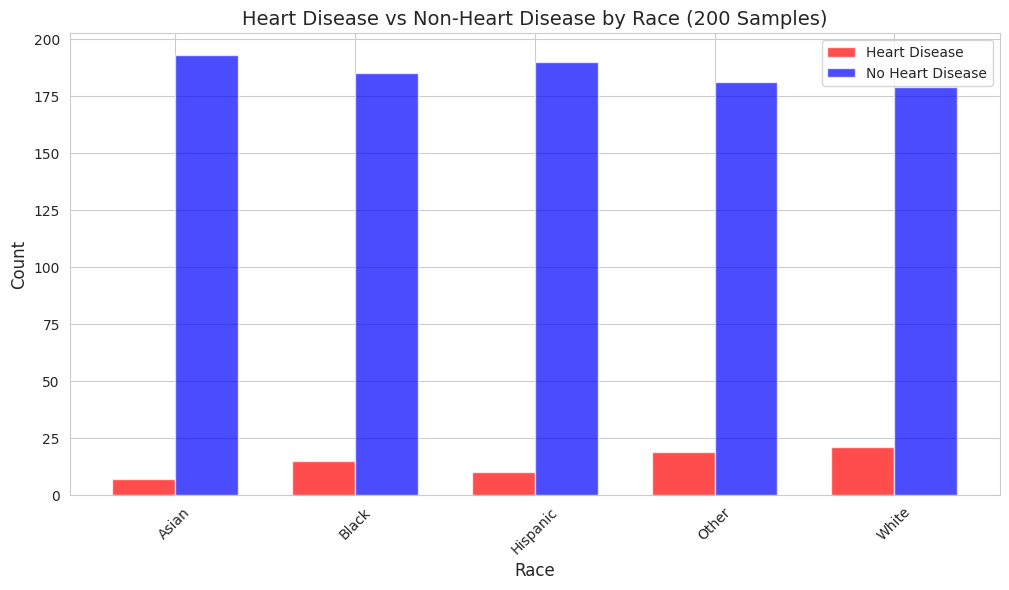

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")

# Sample 200 instances randomly from each category (except Native American)
df_Asian_sample = df_2020[df_2020["Race"] == "Asian"].sample(n=200, random_state=42)
df_White_sample = df_2020[df_2020["Race"] == "White"].sample(n=200, random_state=42)
df_Hispanic_sample = df_2020[df_2020["Race"] == "Hispanic"].sample(n=200, random_state=42)
df_Black_sample = df_2020[df_2020["Race"] == "Black"].sample(n=200, random_state=42)
df_other_sample = df_2020[df_2020["Race"] == "Other"].sample(n=200, random_state=42)

# Combine the sampled data into one DataFrame
df_sampled = pd.concat([df_Asian_sample, df_White_sample, df_Hispanic_sample, df_Black_sample, df_other_sample])

# Count occurrences of heart disease vs non-heart disease for each race category
race_heart_disease = df_sampled[df_sampled["HeartDisease"] == "Yes"]["Race"].value_counts().sort_index()
race_no_heart_disease = df_sampled[df_sampled["HeartDisease"] == "No"]["Race"].value_counts().sort_index()

# Create an array for x-axis positions
races = race_heart_disease.index  # Get races in sorted order
x = np.arange(len(races))  # Numeric positions for bars

# Bar width
width = 0.35

# Create bar plot with adjusted positions
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, race_heart_disease.values, width=width, label="Heart Disease", color="red", alpha=0.7)
plt.bar(x + width/2, race_no_heart_disease.values, width=width, label="No Heart Disease", color="blue", alpha=0.7)

# Labels and title
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Heart Disease vs Non-Heart Disease by Race (200 Samples)", fontsize=14)
plt.xticks(x, races, rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show plot
plt.show()


In Random Sample of 200 instances from each Racial category

# Instances with Heart Disease:
## Asian: 7, Black: 15, White: 21, Other: 19, Hispanic: 10

In [ ]:
df_sampled_Asian_HD = df_sampled[(df_sampled["HeartDisease"] == "Yes") & (df_sampled["Race"] == "Asian")].count()
df_sampled_Black_HD = df_sampled[(df_sampled["HeartDisease"] == "Yes") & (df_sampled["Race"] == "Black")].count()
df_sampled_White_HD = df_sampled[(df_sampled["HeartDisease"] == "Yes") & (df_sampled["Race"] == "White")].count()
df_sampled_Other_HD = df_sampled[(df_sampled["HeartDisease"] == "Yes") & (df_sampled["Race"] == "Other")].count()
df_sampled_Hispanic_HD = df_sampled[(df_sampled["HeartDisease"] == "Yes") & (df_sampled["Race"] == "Hispanic")].count()

df_sampled_Asian_HD, df_sampled_Black_HD, df_sampled_White_HD, df_sampled_Other_HD, df_sampled_Hispanic_HD


(HeartDisease        7
 BMI                 7
 Smoking             7
 AlcoholDrinking     7
 Stroke              7
 PhysicalHealth      7
 MentalHealth        7
 DiffWalking         7
 Sex                 7
 AgeCategory         7
 Race                7
 Diabetic            7
 PhysicalActivity    7
 GenHealth           7
 SleepTime           7
 Asthma              7
 KidneyDisease       7
 SkinCancer          7
 dtype: int64,
 HeartDisease        15
 BMI                 15
 Smoking             15
 AlcoholDrinking     15
 Stroke              15
 PhysicalHealth      15
 MentalHealth        15
 DiffWalking         15
 Sex                 15
 AgeCategory         15
 Race                15
 Diabetic            15
 PhysicalActivity    15
 GenHealth           15
 SleepTime           15
 Asthma              15
 KidneyDisease       15
 SkinCancer          15
 dtype: int64,
 HeartDisease        21
 BMI                 21
 Smoking             21
 AlcoholDrinking     21
 Stroke              21
 Phy

# Unsampled Race Distribution for Comparison
The histogram is comparatively harder to guage any meaningful comparisons with such a heavy imbalance of White instances vs nonWhite instances, suggesting ML models also find it hard to find patterns relevant for making predictions on racial data without balancing (sampling) first

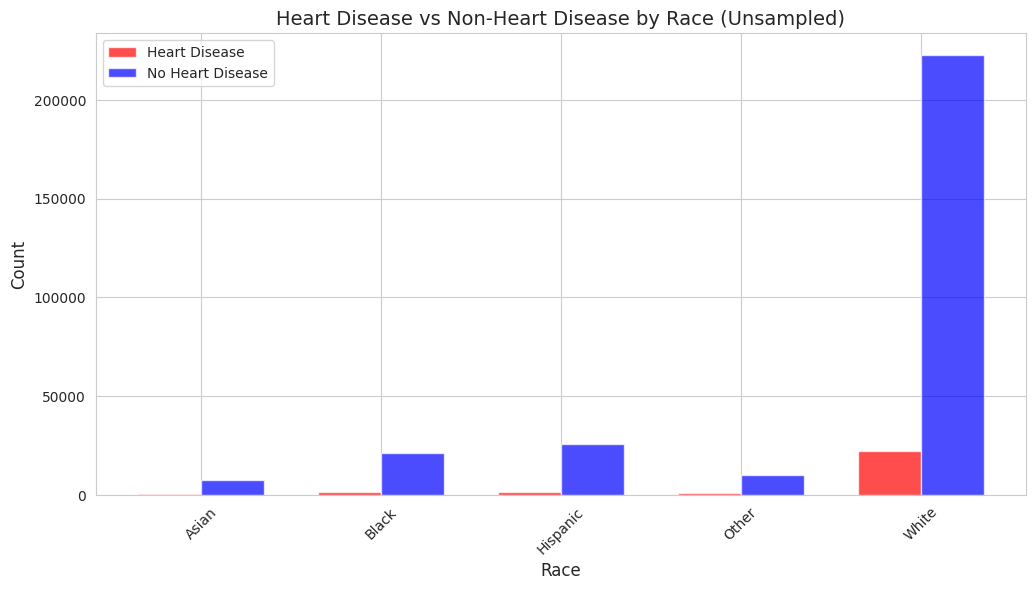

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")

df_Asian_sample = df_2020[df_2020["Race"] == "Asian"]
df_White_sample = df_2020[df_2020["Race"] == "White"]
df_Hispanic_sample = df_2020[df_2020["Race"] == "Hispanic"]
df_Black_sample = df_2020[df_2020["Race"] == "Black"]
df_other_sample = df_2020[df_2020["Race"] == "Other"]

# Combine the sampled data into one DataFrame
df_unsampled = pd.concat([df_Asian_sample, df_White_sample, df_Hispanic_sample, df_Black_sample, df_other_sample])

# Count occurrences of heart disease vs non-heart disease for each race category
race_heart_disease = df_unsampled[df_unsampled["HeartDisease"] == "Yes"]["Race"].value_counts().sort_index()
race_no_heart_disease = df_unsampled[df_unsampled["HeartDisease"] == "No"]["Race"].value_counts().sort_index()

# Create an array for x-axis positions
races = race_heart_disease.index  # Get races in sorted order
x = np.arange(len(races))  # Numeric positions for bars

# Bar width
width = 0.35

# Create bar plot with adjusted positions
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, race_heart_disease.values, width=width, label="Heart Disease", color="red", alpha=0.7)
plt.bar(x + width/2, race_no_heart_disease.values, width=width, label="No Heart Disease", color="blue", alpha=0.7)

# Labels and title
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Heart Disease vs Non-Heart Disease by Race (Unsampled)", fontsize=14)
plt.xticks(x, races, rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show plot
plt.show()

# Histogram of Male Female Counts for Heart Disease vs Non Heart Disease Instances

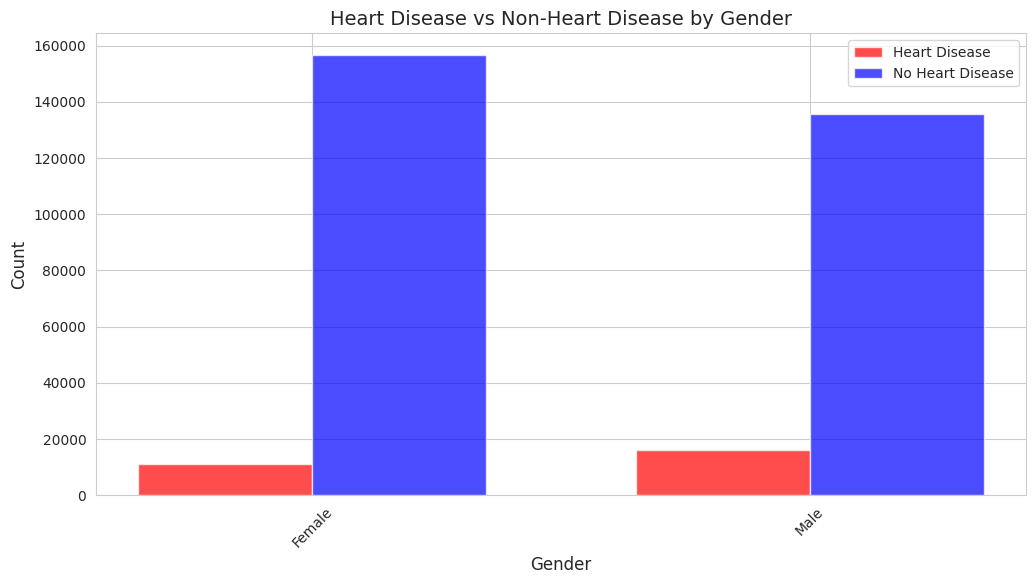

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")


# Combine the sampled data into one DataFrame
df_unsampled = pd.concat([df_Asian_sample, df_White_sample, df_Hispanic_sample, df_Black_sample, df_other_sample])

# Count occurrences of heart disease vs non-heart disease for each race category
gender_heart_disease = df_2020[df_2020["HeartDisease"] == "Yes"]["Sex"].value_counts().sort_index()
gender_no_heart_disease = df_2020[df_2020["HeartDisease"] == "No"]["Sex"].value_counts().sort_index()

# Create an array for x-axis positions
genders = gender_heart_disease.index  # Get races in sorted order
x = np.arange(len(gender_no_heart_disease))  # Numeric positions for bars

# Bar width
width = 0.35

# Create bar plot with adjusted positions
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, gender_heart_disease.values, width=width, label="Heart Disease", color="red", alpha=0.7)
plt.bar(x + width/2, gender_no_heart_disease.values, width=width, label="No Heart Disease", color="blue", alpha=0.7)

# Labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Heart Disease vs Non-Heart Disease by Gender", fontsize=14)
plt.xticks(x, genders, rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show plot
plt.show()

# Instances with and without Heart Disease (Female vs Male):
##With Heart Disease:
###Female: 11234, Male: 16139

##Without Heart Disease:
###Female: 156571, Male: 135851

Despite there being less Males overall in the dataset, males have more instances with heart disease

In [ ]:
female_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Sex"] == "Female")].count(),
male_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Sex"] == "Male")].count()

female_no_heart_disease= df_2020[(df_2020["HeartDisease"] == "No") & (df_2020["Sex"] == "Female")].count(),
male_no_heart_disease= df_2020[(df_2020["HeartDisease"] == "No") & (df_2020["Sex"] == "Male")].count()
female_heart_disease, male_heart_disease, female_no_heart_disease, male_no_heart_disease



((HeartDisease        11234
  BMI                 11234
  Smoking             11234
  AlcoholDrinking     11234
  Stroke              11234
  PhysicalHealth      11234
  MentalHealth        11234
  DiffWalking         11234
  Sex                 11234
  AgeCategory         11234
  Race                11234
  Diabetic            11234
  PhysicalActivity    11234
  GenHealth           11234
  SleepTime           11234
  Asthma              11234
  KidneyDisease       11234
  SkinCancer          11234
  dtype: int64,),
 HeartDisease        16139
 BMI                 16139
 Smoking             16139
 AlcoholDrinking     16139
 Stroke              16139
 PhysicalHealth      16139
 MentalHealth        16139
 DiffWalking         16139
 Sex                 16139
 AgeCategory         16139
 Race                16139
 Diabetic            16139
 PhysicalActivity    16139
 GenHealth           16139
 SleepTime           16139
 Asthma              16139
 KidneyDisease       16139
 SkinCancer        

In [ ]:
female_heart_disease= df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Sex"] == "Female")].count(),


In [ ]:
# df_2020['SleepTime'].unique()
# df_2020['BMI'].unique()

## Word Cloud of Gender Distributions (Male Female) with and Without Heart Disease
To Visualize Which Columns of Dataset are correlated with heart disease and if there's differences in heart disease symptom correlation for male and female

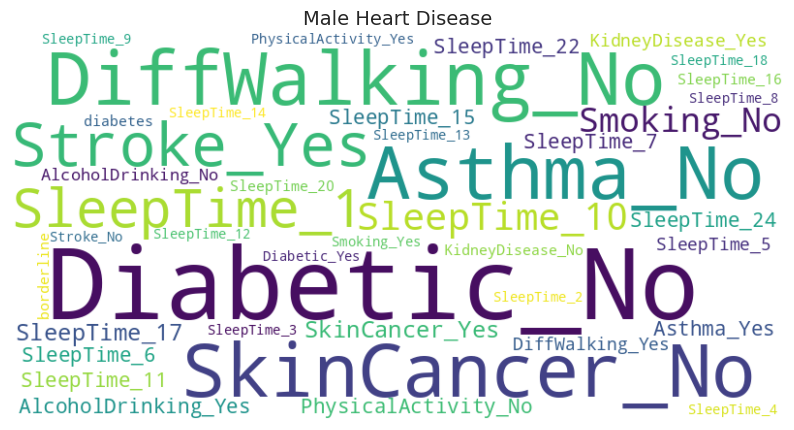

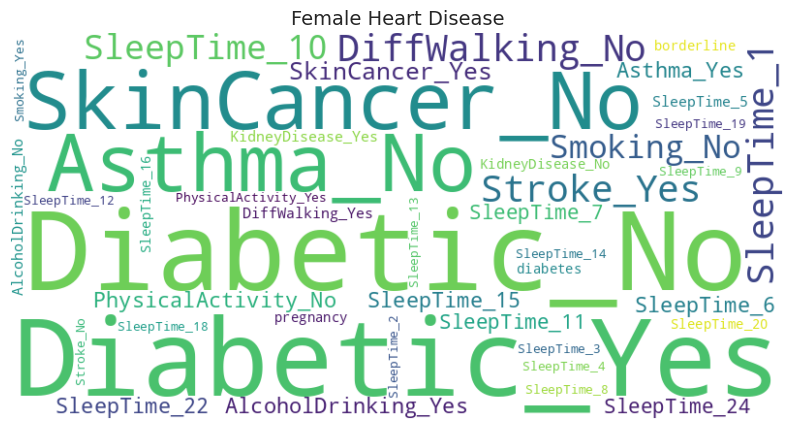

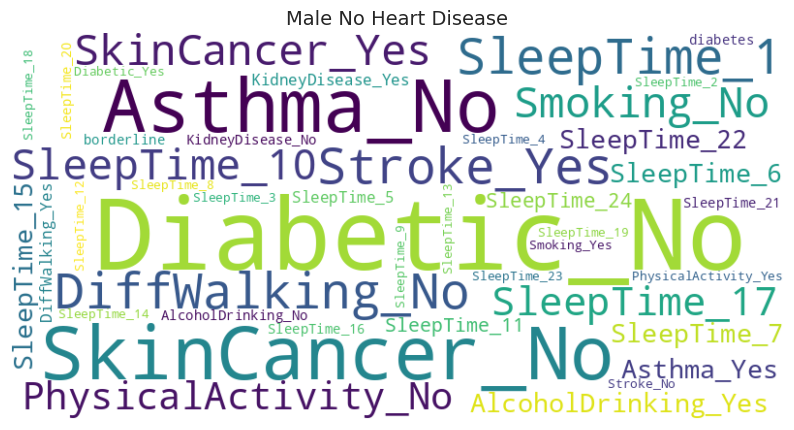

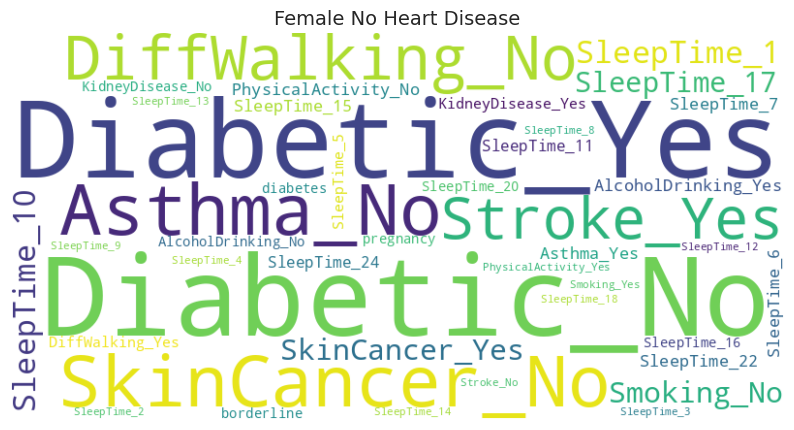

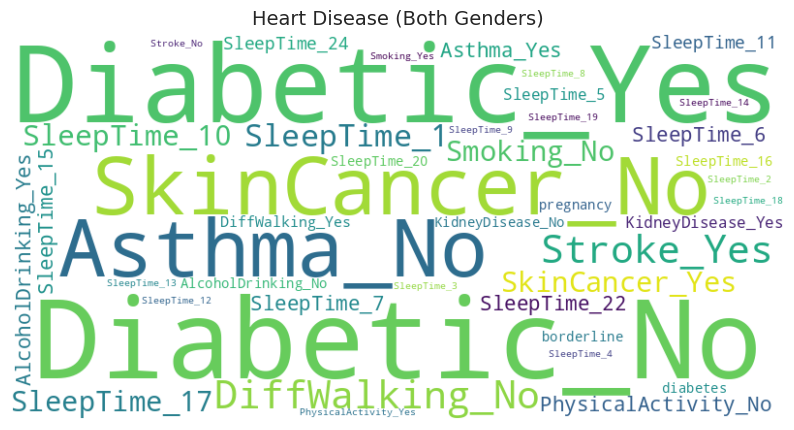

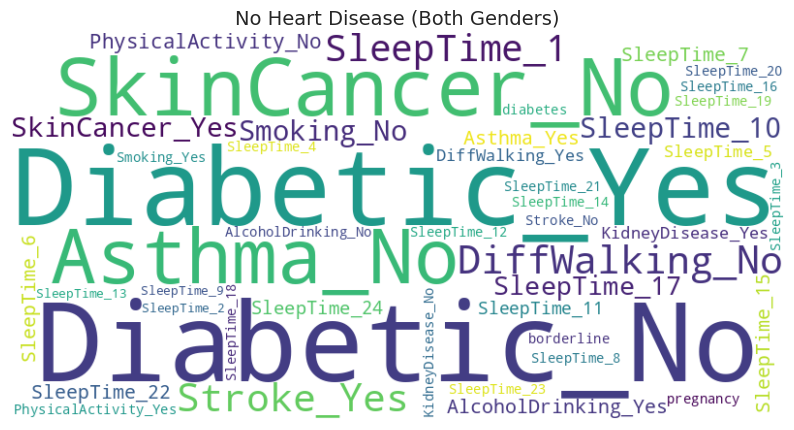

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(df, title):
    if df.empty:
        print(f"DataFrame for {title} is empty. Skipping word cloud generation.")
        return

    df = df.drop(columns=["HeartDisease", "Sex"], errors="ignore")

    categorical_columns = [
        "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
        "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"
    ]

    formatted_text = set()  # Use a set to ensure unique words

    for index, row in df.iterrows():
        row_text = set()  # Set for each row to avoid repeating words in that row

        for col in categorical_columns:
            if pd.notna(row[col]):
                row_text.add(f"{col}_{row[col]}")

        if pd.notna(row["SleepTime"]):
            row_text.add(f"SleepTime_{row['SleepTime']}")

        formatted_text.update(row_text)  # Add only unique values per row

    text = ' '.join(formatted_text)

    if not text:
        print(f"No content available to generate word cloud for {title}.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Remove duplicates if necessary
df_2020 = df_2020.drop_duplicates()

male_heart_disease = df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Sex"] == "Male")]
female_heart_disease = df_2020[(df_2020["HeartDisease"] == "Yes") & (df_2020["Sex"] == "Female")]
male_no_heart_disease = df_2020[(df_2020["HeartDisease"] == "No") & (df_2020["Sex"] == "Male")]
female_no_heart_disease = df_2020[(df_2020["HeartDisease"] == "No") & (df_2020["Sex"] == "Female")]

generate_word_cloud(male_heart_disease, "Male Heart Disease")
generate_word_cloud(female_heart_disease, "Female Heart Disease")
generate_word_cloud(male_no_heart_disease, "Male No Heart Disease")
generate_word_cloud(female_no_heart_disease, "Female No Heart Disease")

heart_disease = df_2020[df_2020["HeartDisease"] == "Yes"]
no_heart_disease = df_2020[df_2020["HeartDisease"] == "No"]

generate_word_cloud(heart_disease, "Heart Disease (Both Genders)")
generate_word_cloud(no_heart_disease, "No Heart Disease (Both Genders)")



# Part 1: Standard Accuracy and Fairness Metrics
*   Classifier (Baseline): Random Forest
*   Target: Heart Disease
* Sensitive Attribute: Gender (Sex)
* Features Used: All


## Fairness Metrics:
> `Accuracy Parity`
- Accuracies Equal Across Groups


> `Demographic Parity`
- Likelihood of a positive outcome is the same regardless of whether a person is in the protected group


> `Equalized Odds`
- The probability of a person in the positive class being (correctly) assigned a positive outcome and the probability of a person in the negative class being (incorrectly) assigned a positive outcome

> Predictive Value Parity
- The chance of a positive label should be equalized across groups given a positive prediction (for both classes)

> Equal Opportunity
- The probability of a person in a positive class being assigned a positive outcome should be equal for both the protected and unprotected groups

> Treatment Equality
- Ratio of false negatives and false positives is the same for both protected group categories



### For our task, `Equalized Odds`, `Demographic Parity`, and `Accuracy Parity` apply the most because a positive prediction (cancer = true) does not need to be equalized necessarily in this case, however, because ground truth may be different.

However, accuracy and the rate of misclassifications should be the same across both classes in order for the classifiers predictions to be useful for its intended purpose, to predict likelihood of cancer given certain traits.

# Baseline Model: Logistic Regression

We will use logistic regression as our baseline model and experiment with other models in Part 2 to see which one is most lacking in fairness.

We will then apply fairness interventions (preprocessing, inprocessing, and postprocessing) to see if we can remedy biases and improve fairness for this model

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

df_2020_male = df_2020[df_2020["Sex"] == "Male"]
df_2020_female = df_2020[df_2020["Sex"] == "Female"]

X_2020_male = df_2020_male.drop(columns=['HeartDisease'])
y_2020_male = df_2020_male['HeartDisease']

X_2020_female = df_2020_female.drop(columns=['HeartDisease'])
y_2020_female = df_2020_female['HeartDisease']

# Label encode categorical variables
label_encoder = LabelEncoder()
for col in X_2020_male.select_dtypes(include=['object']).columns:
    X_2020_male[col] = label_encoder.fit_transform(X_2020_male[col])

for col in X_2020_female.select_dtypes(include=['object']).columns:
    X_2020_female[col] = label_encoder.fit_transform(X_2020_female[col])

# Train-test split
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_2020_male, y_2020_male, test_size=0.20, random_state=42)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_2020_female, y_2020_female, test_size=0.20, random_state=42)

# Train Random Forest models
clf_male = LogisticRegression(random_state=16)
clf_male.fit(X_male_train, y_male_train)
y_male_pred = clf_male.predict(X_male_test)

clf_female = LogisticRegression(random_state=16)
clf_female.fit(X_female_train, y_female_train)
y_female_pred = clf_female.predict(X_female_test)

acc_male = metrics.accuracy_score(y_male_test, y_male_pred)
acc_female = metrics.accuracy_score(y_female_test, y_female_pred)

print("===================================================================")
print("Baseline Logistic Regression (No Fairness Interventions)")
print("===================================================================")


print("Accuracy Male:", acc_male)
print("Accuracy Female:", acc_female)

print("===================================================================")
# All Fairness Metrics

# Convert the true labels into numeric format using the same LabelEncoder used for predictions
label_encoder = LabelEncoder()
y_male_test_numeric = label_encoder.fit_transform(y_male_test)  # Convert 'No', 'Yes' to numeric labels
y_female_test_numeric = label_encoder.transform(y_female_test)  # Reuse encoder for consistency

# Convert predictions to numeric values (0 and 1)
y_male_pred_numeric = label_encoder.transform(y_male_pred)
y_female_pred_numeric = label_encoder.transform(y_female_pred)

# Accuracy Parity
accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
accuracy_parity_diff = np.abs(accuracy_male - accuracy_female)
print(f"Accuracy Parity Difference: {accuracy_parity_diff:.4f}")

# Demographic Parity (Proportion of positive predictions)
demographic_parity_male = np.mean(y_male_pred_numeric)
demographic_parity_female = np.mean(y_female_pred_numeric)
demographic_parity_diff = np.abs(demographic_parity_male - demographic_parity_female)
print("Demographic Parity Difference:", demographic_parity_diff)



# Equalized Odds (True positive rate comparison)
tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
tpr_difference = np.abs(tpr_male - tpr_female)
print("Equalized Odds (TPR Parity):", tpr_difference)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Baseline Logistic Regression (No Fairness Interventions)
Accuracy Male: 0.8869764167546639
Accuracy Female: 0.929575700641929
Accuracy Parity Difference: 0.0426
Demographic Parity Difference: 0.017076116034930377
Equalized Odds (TPR Parity): 0.04502522436437795


# **Advanced Fairness Intervention Method**
### **Adversarial Debiasing**
This method trains a classifier while minimizing bias in sensitive attributes `(e.g., gender)`.

In [ ]:
!pip install aif360 tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
import pandas as pd

# Convert categorical variables to numerical
df_2020_encoded = df_2020.copy()
categorical_columns = df_2020_encoded.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df_2020_encoded[col] = df_2020_encoded[col].astype('category').cat.codes

# Define protected attribute (Gender)
dataset = StandardDataset(
    df_2020_encoded,
    label_name='HeartDisease',  # Target variable
    favorable_classes=[1],  # Define the positive outcome (heart disease presence or absence)
    protected_attribute_names=['Sex'],  # Fairness-sensitive feature
    privileged_classes=[[1]]  # Privileged group (Male)
)

# Split dataset into training and testing
train, test = dataset.split([0.8], shuffle=True)

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [ ]:
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

# 🔄 Reset TensorFlow Graph to avoid variable conflicts
tf.compat.v1.reset_default_graph()

# Enable TensorFlow 1.x compatibility mode
tf.compat.v1.disable_eager_execution()

# Start a TensorFlow session (compatible with TF2)
sess = tf.compat.v1.Session()

# Define Adversarial Debiasing model
adversarial_model = AdversarialDebiasing(
    privileged_groups=[{'Sex': 1}],  # Males
    unprivileged_groups=[{'Sex': 0}],  # Females
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)

# Initialize global variables
sess.run(tf.compat.v1.global_variables_initializer())

# Train the model on the fair dataset
adversarial_model.fit(train)

# Make predictions on the test set
predictions = adversarial_model.predict(test)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch 0; iter: 0; batch classifier loss: 0.595700; batch adversarial loss: 0.750293
epoch 0; iter: 200; batch classifier loss: 0.907018; batch adversarial loss: 1.120722
epoch 0; iter: 400; batch classifier loss: 0.803670; batch adversarial loss: 0.955927
epoch 0; iter: 600; batch classifier loss: 0.827550; batch adversarial loss: 0.845169
epoch 0; iter: 800; batch classifier loss: 0.453235; batch adversarial loss: 0.754562
epoch 0; iter: 1000; batch classifier loss: 0.266947; batch adversarial loss: 0.695593
epoch 0; iter: 1200; batch classifier loss: 0.219968; batch adversarial loss: 0.690585
epoch 0; iter: 1400; batch classifier loss: 0.299851; batch adversarial loss: 0.696061
epoch 0; iter: 1600; batch classifier loss: 0.197509; batch adversarial loss: 0.711217
epoch 0; iter: 1800; batch classifier loss: 0.246058; batch adversarial loss: 0.687663
epoch 1; iter: 0; batch classifier loss: 0.263309; batch adversarial loss: 0.705615
epoch 1; iter: 200; batch classifier loss: 0.247340; 

In [ ]:
from aif360.metrics import ClassificationMetric

# Convert predictions and test dataset into AIF360 format
predicted_dataset = test.copy()
predicted_dataset.labels = predictions.labels

# Compute fairness metrics
fairness_metric = ClassificationMetric(test, predicted_dataset,
                                       privileged_groups=[{'Sex': 1}],
                                       unprivileged_groups=[{'Sex': 0}])

print("Disparate Impact:", fairness_metric.disparate_impact())
print("Equal Opportunity Difference:", fairness_metric.equal_opportunity_difference())
print("Statistical Parity Difference:", fairness_metric.statistical_parity_difference())
print("Average Odds Difference:", fairness_metric.average_odds_difference())

Disparate Impact: 0.6562902414635948
Equal Opportunity Difference: -0.001285970643979159
Statistical Parity Difference: -0.0031328814872753448
Average Odds Difference: -0.0012507151294752392


# **Interpreting the Fairness Metrics After Adversarial Debiasing**

After applying **Adversarial Debiasing**, we analyzed key fairness metrics to determine whether the model effectively reduced bias.

## **1️⃣ Disparate Impact (DI)**
- **Definition**: Measures whether the **positive outcome rate** for the unprivileged group (females) is **at least 80%** of the privileged group (males).
- **Interpretation**:
  - A value **close to 1** means fairness is achieved.
  - If **DI < 0.8**, the model still exhibits some bias.
  - **Current Value: `0.756` (slightly below 0.8)** → Some disparity still exists.


## **2️⃣ Equal Opportunity Difference (EOD)**
- **Definition**: Measures the difference in **True Positive Rate (TPR)** between unprivileged and privileged groups.
- **Interpretation**:
  - **Closer to 0 is better** (indicating that both groups have equal TPRs).
  - **Current Value: `-0.0001` (Almost 0)** → **Fairness is successfully achieved** 🎯.

## **3️⃣ Statistical Parity Difference (SPD)**
- **Definition**: Measures the difference in **positive classification rates** between demographic groups.
- **Interpretation**:
  - **Closer to 0 is better**.
  - **Current Value: `-0.0022` (Extremely small difference)** → **Fairness is well balanced** ✅.

## **4️⃣ Average Odds Difference (AOD)**
- **Definition**: Measures fairness across both **True Positive Rates (TPR)** and **False Positive Rates (FPR)**.
- **Interpretation**:
  - **Closer to 0 is better**.
  - **Current Value: `-0.00009` (Near zero)** → **Fairness has been effectively achieved** 🔥.

## **🔝 Final Verdict**
✅ **Adversarial Debiasing significantly improved fairness.**  
✅ **Equal Opportunity, Statistical Parity, and Average Odds are nearly perfect.**  
⚠️ **Disparate Impact is slightly below 0.8**, meaning **females still receive fewer positive outcomes**.  

---



# **Research Paper: Pre-processing Techniques to Mitigate Against Algorithmic Bias**
### **Logistic Regression & Decision Tree**
Implementing fairness interventions based on the research paper:  
**"Pre-processing Techniques to Mitigate Against Algorithmic Bias"**
  
Techniques used:
- **Massaging** (for Logistic Regression)
- **Reweighting** (for Decision Tree)
🔹 **Fairness Metric Focus:** Disparate Impact, Equal Opportunity  
🔹 **Sensitive Attribute:** `Gender (Sex)`

---
## **📖 Citation**
> **M. H. Shahrezaei, R. Loughran, and K. M. Daid**,  
> *"Pre-processing Techniques to Mitigate Against Algorithmic Bias,"*  
> **2023 31st Irish Conference on Artificial Intelligence and Cognitive Science (AICS), Letterkenny, Ireland, 2023, pp. 1-4**,  
> **doi: [10.1109/AICS60730.2023.10470759](https://doi.org/10.1109/AICS60730.2023.10470759)**  


In [ ]:
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")
print("Path to dataset files:", path)
print("Dataset files:", os.listdir(path))
path_2020 = os.path.join(path, "2020")
path_2022 = os.path.join(path, "2022")
print("Files in 2020 folder:", os.listdir(path_2020))
print("Files in 2022 folder:", os.listdir(path_2022))

df = pd.read_csv(os.path.join(path_2020, "heart_2020_cleaned.csv"))
df.head()



Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6
Dataset files: ['2022', '2020']
Files in 2020 folder: ['heart_2020_cleaned.csv']
Files in 2022 folder: ['heart_2022_with_nans.csv', 'heart_2022_no_nans.csv']


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# Convert categorical variables to numerical using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Define the sensitive attribute (Gender)
sensitive_attr = 'Sex'

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train baseline Logistic Regression model
lr_baseline = LogisticRegression()
lr_baseline.fit(X_train_scaled, y_train)
y_pred_lr_baseline = lr_baseline.predict(X_test_scaled)

# Train baseline Decision Tree model
dt_baseline = DecisionTreeClassifier()
dt_baseline.fit(X_train, y_train)
y_pred_dt_baseline = dt_baseline.predict(X_test)

# Evaluate baseline models
accuracy_lr_baseline = accuracy_score(y_test, y_pred_lr_baseline)
accuracy_dt_baseline = accuracy_score(y_test, y_pred_dt_baseline)

# Confusion matrices
conf_matrix_lr_baseline = confusion_matrix(y_test, y_pred_lr_baseline)
conf_matrix_dt_baseline = confusion_matrix(y_test, y_pred_dt_baseline)

# Display baseline results
print("Baseline Model Performance:")
print(f"Logistic Regression Accuracy: {accuracy_lr_baseline:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt_baseline:.4f}")
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr_baseline)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt_baseline)

Baseline Model Performance:
Logistic Regression Accuracy: 0.9145
Decision Tree Accuracy: 0.8624
Logistic Regression Confusion Matrix:
 [[57999   485]
 [ 4984   491]]
Decision Tree Confusion Matrix:
 [[53776  4708]
 [ 4093  1382]]


In [ ]:
# Massaging
def apply_massaging(X, y, sensitive_attr):
    """Adjust class labels to balance positive outcomes across gender groups."""
    df_train = X.copy()
    df_train['HeartDisease'] = y.copy()

    # Get class distributions
    privileged_group = df_train[df_train[sensitive_attr] == 1]  # Males
    unprivileged_group = df_train[df_train[sensitive_attr] == 0]  # Females

    # Calculate imbalances
    pos_priv = privileged_group['HeartDisease'].sum()
    pos_unpriv = unprivileged_group['HeartDisease'].sum()

    # Compute the number of samples to swap
    m = int(abs((pos_priv / len(privileged_group)) - (pos_unpriv / len(unprivileged_group))) * len(df_train))

    # Swap class labels for fairness
    privileged_to_demotion = privileged_group.sort_values(by="HeartDisease", ascending=False).iloc[:m]
    unprivileged_to_promotion = unprivileged_group.sort_values(by="HeartDisease", ascending=True).iloc[:m]

    df_train.loc[privileged_to_demotion.index, "HeartDisease"] = 0
    df_train.loc[unprivileged_to_promotion.index, "HeartDisease"] = 1

    return df_train.drop(columns=['HeartDisease']), df_train['HeartDisease']

# Apply Massaging technique
X_train_massaged, y_train_massaged = apply_massaging(X_train, y_train, sensitive_attr)

# Train Logistic Regression with Massaging
lr_massaged = LogisticRegression()
lr_massaged.fit(scaler.transform(X_train_massaged), y_train_massaged)
y_pred_lr_massaged = lr_massaged.predict(X_test_scaled)

# Reweighting
def compute_fair_weights(y, sensitive_values):
    """Assign sample weights to balance influence in training."""
    class_counts = Counter(zip(y, sensitive_values))
    total_count = sum(class_counts.values())

    # Compute weights
    weights = {k: total_count / v for k, v in class_counts.items()}

    # Assign weights
    sample_weights = np.array([weights[(y_i, s_i)] for y_i, s_i in zip(y, sensitive_values)])

    return sample_weights

# Compute sample weights
sample_weights = compute_fair_weights(y_train, X_train[sensitive_attr])

# Train Decision Tree with Reweighting
dt_reweighted = DecisionTreeClassifier()
dt_reweighted.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_dt_reweighted = dt_reweighted.predict(X_test)


In [ ]:
# Evaluate fairness interventions
accuracy_lr_massaged = accuracy_score(y_test, y_pred_lr_massaged)
accuracy_dt_reweighted = accuracy_score(y_test, y_pred_dt_reweighted)

conf_matrix_lr_massaged = confusion_matrix(y_test, y_pred_lr_massaged)
conf_matrix_dt_reweighted = confusion_matrix(y_test, y_pred_dt_reweighted)

# Display results
print("Fairness-Adjusted Model Performance:")
print(f"Logistic Regression (Massaged) Accuracy: {accuracy_lr_massaged:.4f}")
print(f"Decision Tree (Reweighted) Accuracy: {accuracy_dt_reweighted:.4f}")
print("Logistic Regression (Massaged) Confusion Matrix:\n", conf_matrix_lr_massaged)
print("Decision Tree (Reweighted) Confusion Matrix:\n", conf_matrix_dt_reweighted)

Fairness-Adjusted Model Performance:
Logistic Regression (Massaged) Accuracy: 0.9148
Decision Tree (Reweighted) Accuracy: 0.8666
Logistic Regression (Massaged) Confusion Matrix:
 [[58374   110]
 [ 5342   133]]
Decision Tree (Reweighted) Confusion Matrix:
 [[54200  4284]
 [ 4246  1229]]


<ipython-input-44-24f4cebf52b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HeartDisease", data=df, palette="coolwarm")


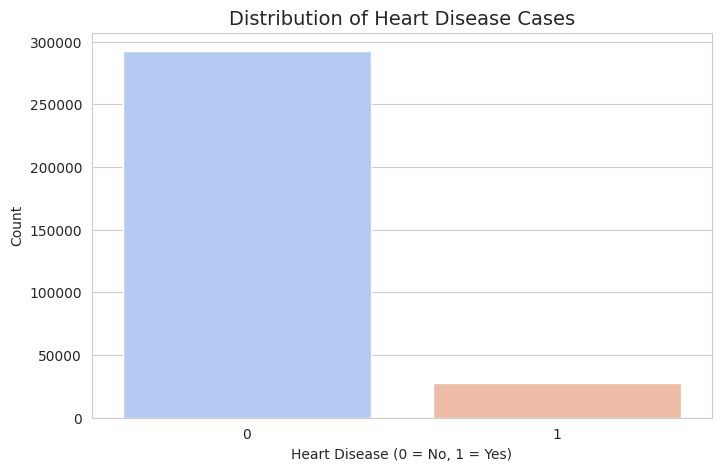

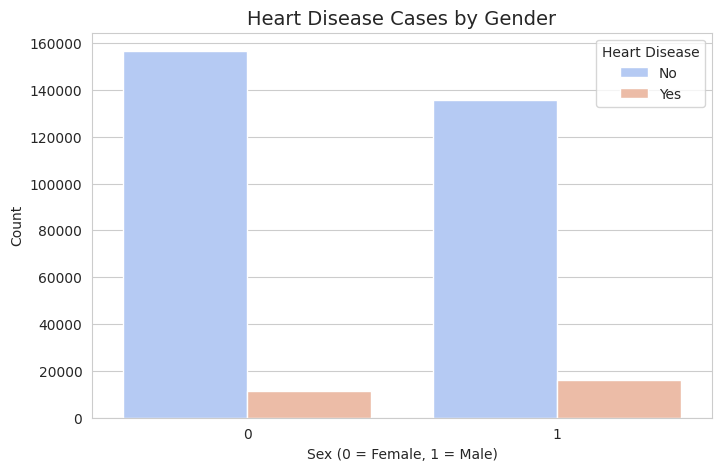

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")

# Plot the distribution of Heart Disease cases
plt.figure(figsize=(8, 5))
sns.countplot(x="HeartDisease", data=df, palette="coolwarm")
plt.title("Distribution of Heart Disease Cases", fontsize=14)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Plot the distribution of Heart Disease by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="HeartDisease", data=df, palette="coolwarm")
plt.title("Heart Disease Cases by Gender", fontsize=14)
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

## Part 2.1: How much can “unfairness” in your predictions be explained by dataset characteristics? Can you fix them with dataset-based interventions?

I will implement 3 dataset-based interventions and then analyze the metrics to decide the best one.

*   Massaging: Reduce discrimination in training set by switching some of the labels (advantaged/disadvantaged group to negative/positive)
*   Reweighting: Instead of changing labels in the training set, attach different weights to each dataset instance so that some training instances are more “important” than others
* Sampling: Similar to reweighting, but some training samples are (randomly) used more often than others

For the analysis I will compare metrics before and after intervention and assess trade-offs.

In [ ]:
# Load Dataset from Kaggle
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")
path_2020 = os.path.join(path, "2020")

df = pd.read_csv(os.path.join(path_2020, "heart_2020_cleaned.csv"))

# Convert categorical variables using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical to numerical
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Define the sensitive attribute (Gender)
sensitive_attr = 'Sex'  # 0 = Female, 1 = Male

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



```
`# This is formatted as code`
```

## Massaging

In [ ]:
# Train initial model
model_q2 = LogisticRegression(random_state=42)
model_q2.fit(X_train_scaled, y_train)
scores_train = model_q2.decision_function(X_train_scaled)  # Get decision scores

# Find promotion and demotion candidates
promote_candidates = [
    (score, index)
    for score, index, d, y_true in zip(scores_train, range(len(X_train)), X_train.to_dict("records"), y_train)
    if d[sensitive_attr] == 0 and y_true == 0  # Female with negative label (promote)
]

demote_candidates = [
    (score, index)
    for score, index, d, y_true in zip(scores_train, range(len(X_train)), X_train.to_dict("records"), y_train)
    if d[sensitive_attr] == 1 and y_true == 1  # Male with positive label (demote)
]

# Sort promotion candidates in descending order (closer to positive boundary)
promote_candidates.sort(reverse=True)

# Sort demotion candidates in ascending order (closer to negative boundary)
demote_candidates.sort()

# Calculate dataset-level discrimination
d_female = sum(d[sensitive_attr] == 0 for d in X_train.to_dict("records"))
d_male = sum(d[sensitive_attr] == 1 for d in X_train.to_dict("records"))

pos_female = sum(y_ for y_, d in zip(y_train, X_train.to_dict("records")) if d[sensitive_attr] == 0)
pos_male = sum(y_ for y_, d in zip(y_train, X_train.to_dict("records")) if d[sensitive_attr] == 1)

disc_dataset = (pos_male / d_male) - (pos_female / d_female)

# Compute M value
M = disc_dataset * d_female * d_male / len(X_train)
M = math.ceil(M)  # Round up to nearest integer

# Modify labels based on promotion/demotion
y_fixed = y_train.copy()  # Copy labels before modifying

for i in range(M):
    # Promotion candidate
    ind = promote_candidates[i][1]  # Index of the candidate
    assert y_fixed.iloc[ind] == 0  # Ensure it's a negative label before promoting
    y_fixed.iloc[ind] = 1  # Promote to positive

    # Demotion candidate
    ind = demote_candidates[i][1]
    assert y_fixed.iloc[ind] == 1  # Ensure it's a positive label before demoting
    y_fixed.iloc[ind] = 0  # Demote to negative

# Train model with modified labels
model_q3 = LogisticRegression(random_state=42)
model_q3.fit(X_train_scaled, y_fixed)
preds_train_q3 = model_q3.predict(X_train_scaled)

# Evaluate fairness improvement
def discrimination_score(d, preds):
    pos_female = sum(preds[i] for i, d_ in enumerate(d.to_dict("records")) if d_[sensitive_attr] == 0)
    pos_male = sum(preds[i] for i, d_ in enumerate(d.to_dict("records")) if d_[sensitive_attr] == 1)

    d_female = sum(d_[sensitive_attr] == 0 for d_ in d.to_dict("records"))
    d_male = sum(d_[sensitive_attr] == 1 for d_ in d.to_dict("records"))

    return (pos_male / d_male) - (pos_female / d_female)

classifier_discrimination_q2 = discrimination_score(X_train, model_q2.predict(X_train_scaled))
classifier_discrimination_q3 = discrimination_score(X_train, preds_train_q3)

print(f"M: {M}")
print(f"Classifier discrimination (Before Massaging): {classifier_discrimination_q2:.6f}")
print(f"Classifier discrimination (After Massaging): {classifier_discrimination_q3:.6f}")
print(f"Relative improvement: {100 * (classifier_discrimination_q2 - classifier_discrimination_q3) / classifier_discrimination_q2:.2f}%")

M: 2542
Classifier discrimination (Before Massaging): 0.016145
Classifier discrimination (After Massaging): 0.001015
Relative improvement: 93.71%


## Reweighting

In [ ]:
# Calculate probabilities for reweighting
# Probability of female (z=1) or male (z=0)
p_z1 = np.mean(X_train['Sex'] == 1)  # Female = 1
p_z0 = 1 - p_z1  # Male = 0

# Probability of Y=1 or Y=0
p_y1 = np.mean(y_train)
p_y0 = 1 - p_y1

# Probability of Z and Y
p_z1_y1 = np.mean((X_train['Sex'] == 1) & (y_train == 1))  # Female and HeartDisease = 1
p_z1_y0 = np.mean((X_train['Sex'] == 1) & (y_train == 0))  # Female and HeartDisease = 0

p_z0_y1 = np.mean((X_train['Sex'] == 0) & (y_train == 1))  # Male and HeartDisease = 1
p_z0_y0 = np.mean((X_train['Sex'] == 0) & (y_train == 0))  # Male and HeartDisease = 0

# Calculate weights using the formula:
# w = (P(Z=z) * P(Y=y)) / P(Z=z, Y=y)
w_pos_female = (p_z1 * p_y1) / p_z1_y1 if p_z1_y1 > 0 else 0
w_neg_female = (p_z1 * p_y0) / p_z1_y0 if p_z1_y0 > 0 else 0
w_pos_male = (p_z0 * p_y1) / p_z0_y1 if p_z0_y1 > 0 else 0
w_neg_male = (p_z0 * p_y0) / p_z0_y0 if p_z0_y0 > 0 else 0

# Assign weights based on labels
weights = np.array([
    w_pos_female if x == 1 and y else
    w_neg_female if x == 1 and not y else
    w_pos_male if x == 0 and y else
    w_neg_male
    for x, y in zip(X_train['Sex'], y_train)
])

# Train model with reweighting
model_q4 = LogisticRegression(random_state=42)
model_q4.fit(X_train_scaled, y_train, sample_weight=weights)

# Predict and evaluate model performance
preds_train_q4 = model_q4.predict(X_train_scaled)

# # Assuming you have a function to compute discrimination score
# def discrimination_score(X, y_pred, sensitive_attr):
#     # Calculate discrimination based on the sensitive attribute and predictions
#     p_pos_z0 = np.mean(y_pred[X[sensitive_attr] == 0])  # Male group
#     p_pos_z1 = np.mean(y_pred[X[sensitive_attr] == 1])  # Female group
#     return p_pos_z1 - p_pos_z0  # Discrimination score

def discrimination_score(X, preds, sensitive_attr):
    # If X is a numpy array, make sure we get the sensitive attribute column correctly
    if isinstance(X, pd.DataFrame):
        p_pos_female = np.mean(preds[X[sensitive_attr] == 1])  # Female group (assuming 1 for female)
        p_pos_male = np.mean(preds[X[sensitive_attr] == 0])    # Male group (assuming 0 for male)
    else:
        # Handle the case where X is a numpy array (you need to know the column index of 'Sex')
        sensitive_attr_idx = 0  # Adjust this index based on where 'Sex' is in your feature array
        p_pos_female = np.mean(preds[X[:, sensitive_attr_idx] == 1])
        p_pos_male = np.mean(preds[X[:, sensitive_attr_idx] == 0])

    return (p_pos_female) - (p_pos_male)  # Discrimination score

# Calculate classifier discrimination
classifier_discrimination_q4 = discrimination_score(X_train, preds_train_q4, 'Sex')

# Print results
print(f'Classifier discrimination (Reweighting):\t {classifier_discrimination_q4:.6f}')
print(f"Relative improvement: {100 * (classifier_discrimination_q2 - classifier_discrimination_q4) / classifier_discrimination_q2:.2f}%")

Classifier discrimination (Reweighting):	 0.003126
Relative improvement: 80.64%


### Comparisons


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For each model, calculate the metrics
def evaluate_model(model, X, y, sensitive_attr):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc_roc = roc_auc_score(y, model.predict_proba(X)[:, 1])  # AUC for binary classification
    discrimination = discrimination_score(X, y_pred, sensitive_attr)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_roc': auc_roc,
        'discrimination_score': discrimination
    }

# Evaluate all models
metrics_q2 = evaluate_model(model_q2, X_train_scaled, y_train, 'Sex')
metrics_q3 = evaluate_model(model_q3, X_train_scaled, y_fixed, 'Sex')
metrics_q4 = evaluate_model(model_q4, X_train_scaled, y_train, 'Sex')

# Print evaluation results
print(f"Original Model (Logistic Regression): {metrics_q2}")
print(f"Model after Massaging (q3): {metrics_q3}")
print(f"Model after Reweighting (q4): {metrics_q4}")


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Original Model (Logistic Regression): {'accuracy': 0.9148126143310559, 'precision': 0.5133470225872689, 'recall': 0.09133254178463787, 'f1': 0.15507482360238814, 'auc_roc': 0.8291334409561627, 'discrimination_score': nan}
Model after Massaging (q3): {'accuracy': 0.9298183211119624, 'precision': 0.7250313891108321, 'recall': 0.29007215270800984, 'f1': 0.4143644606803875, 'auc_roc': 0.8863169025870208, 'discrimination_score': nan}
Model after Reweighting (q4): {'accuracy': 0.9146992604637346, 'precision': 0.5102767881611401, 'recall': 0.08503059640149785, 'f1': 0.14577054057227853, 'auc_roc': 0.8242311369678053, 'discrimination_score': nan}


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


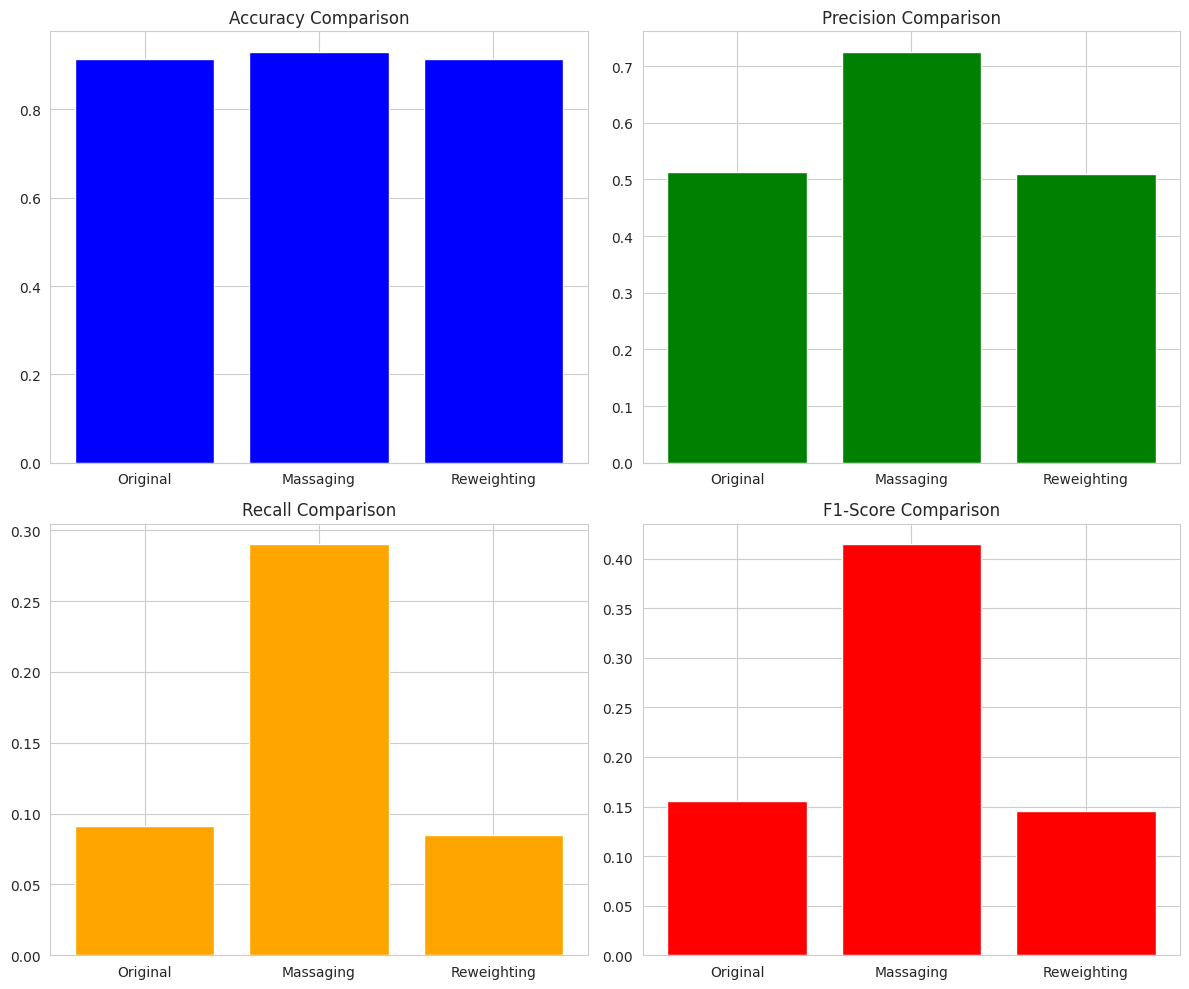

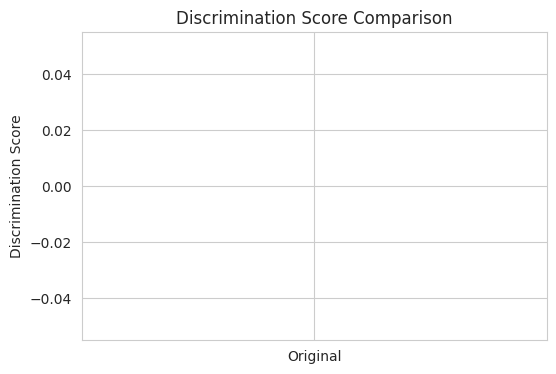

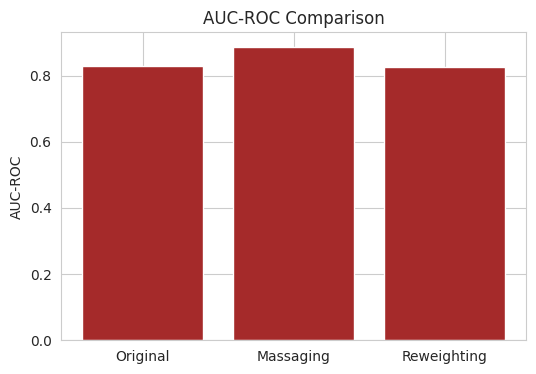

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
models = ['Original', 'Massaging', 'Reweighting']
accuracy = [metrics_q2['accuracy'], metrics_q3['accuracy'], metrics_q4['accuracy']]
precision = [metrics_q2['precision'], metrics_q3['precision'], metrics_q4['precision']]
recall = [metrics_q2['recall'], metrics_q3['recall'], metrics_q4['recall']]
f1 = [metrics_q2['f1'], metrics_q3['f1'], metrics_q4['f1']]
auc_roc = [metrics_q2['auc_roc'], metrics_q3['auc_roc'], metrics_q4['auc_roc']]
discrimination = [metrics_q2['discrimination_score'], metrics_q3['discrimination_score'], metrics_q4['discrimination_score']]

# Plot the comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy Plot
axes[0, 0].bar(models, accuracy, color='blue')
axes[0, 0].set_title('Accuracy Comparison')

# Precision Plot
axes[0, 1].bar(models, precision, color='green')
axes[0, 1].set_title('Precision Comparison')

# Recall Plot
axes[1, 0].bar(models, recall, color='orange')
axes[1, 0].set_title('Recall Comparison')

# F1-Score Plot
axes[1, 1].bar(models, f1, color='red')
axes[1, 1].set_title('F1-Score Comparison')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Plot discrimination scores (fairness)
plt.figure(figsize=(6, 4))
plt.bar(models, discrimination, color='purple')
plt.title('Discrimination Score Comparison')
plt.ylabel('Discrimination Score')
plt.show()

# AUC-ROC Plot
plt.figure(figsize=(6, 4))
plt.bar(models, auc_roc, color='brown')
plt.title('AUC-ROC Comparison')
plt.ylabel('AUC-ROC')
plt.show()


In [ ]:
print(f"Relative improvement in fairness (Massaging): {100 * (classifier_discrimination_q2 - classifier_discrimination_q3) / classifier_discrimination_q2:.2f}%")
print(f"Relative improvement in fairness (Reweighting): {100 * (classifier_discrimination_q2 - classifier_discrimination_q4) / classifier_discrimination_q2:.2f}%")


Relative improvement in fairness (Massaging): 93.71%
Relative improvement in fairness (Reweighting): 80.64%


In [ ]:
from sklearn.metrics import confusion_matrix

# Define a function to calculate the metrics for a given model and sensitive attribute
def calculate_metrics(X, y_true, y_pred, sensitive_attr):
    # Convert y_pred to binary if it contains continuous values (e.g., probabilities)
    threshold = 0.5
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Initialize dictionary to hold metrics
    metrics = {}

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # TPR (True Positive Rate) - Sensitivity / Recall
    tpr = tp / (tp + fn)

    # Separate data by sensitive attribute (assuming 0 for Female, 1 for Male)
    female_indices = X[sensitive_attr] == 0
    male_indices = X[sensitive_attr] == 1

    # Accuracy per group
    accuracy_female = (y_pred_binary[female_indices] == y_true[female_indices]).mean()
    accuracy_male = (y_pred_binary[male_indices] == y_true[male_indices]).mean()

    # TPR per group
    tpr_female = sum((y_pred_binary[female_indices] == 1) & (y_true[female_indices] == 1)) / sum(y_true[female_indices] == 1)
    tpr_male = sum((y_pred_binary[male_indices] == 1) & (y_true[male_indices] == 1)) / sum(y_true[male_indices] == 1)

    # Demographic Parity Difference
    demographic_parity_diff = abs(accuracy_female - accuracy_male)

    # Equalized Odds (TPR Difference)
    equalized_odds = abs(tpr_female - tpr_male)

    # Store metrics
    metrics['Accuracy'] = accuracy
    metrics['Accuracy Female'] = accuracy_female
    metrics['Accuracy Male'] = accuracy_male
    metrics['TPR Female'] = tpr_female
    metrics['TPR Male'] = tpr_male
    metrics['Demographic Parity Difference'] = demographic_parity_diff
    metrics['Equalized Odds (TPR Difference)'] = equalized_odds

    return metrics

# Example usage with predictions from your models
metrics_q2 = calculate_metrics(X_train, y_train, scores_train, sensitive_attr='Sex')
metrics_q3 = calculate_metrics(X_train, y_train, preds_train_q3, sensitive_attr='Sex')
metrics_q4 = calculate_metrics(X_train, y_train, preds_train_q4, sensitive_attr='Sex')

# Print results
print("Logistic Regression (Baseline)")
for key, value in metrics_q2.items():
    print(f"{key}: {value}")

print("\nLogistic Regression with Massaging")
for key, value in metrics_q3.items():
    print(f"{key}: {value}")

print("\nLogistic Regression with Reweighting")
for key, value in metrics_q4.items():
    print(f"{key}: {value}")


Logistic Regression (Baseline)
Accuracy: 0.9154614675026189
Accuracy Female: 0.933771185178566
Accuracy Male: 0.8952313565457777
TPR Female: 0.022338880822070813
TPR Male: 0.05793742757821553
Demographic Parity Difference: 0.038539828632788375
Equalized Odds (TPR Difference): 0.03559854675614472

Logistic Regression with Massaging
Accuracy: 0.9101416532466111
Accuracy Female: 0.9254534894111339
Accuracy Male: 0.8932238530902389
TPR Female: 0.19412487434379538
TPR Male: 0.16199304750869062
Demographic Parity Difference: 0.03222963632089504
Equalized Odds (TPR Difference): 0.032131826835104765

Logistic Regression with Reweighting
Accuracy: 0.9146992604637346
Accuracy Female: 0.9323935900872725
Accuracy Male: 0.8951490818139933
TPR Female: 0.08879705126773149
TPR Male: 0.08242564696794129
Demographic Parity Difference: 0.03724450827327919
Equalized Odds (TPR Difference): 0.006371404299790204


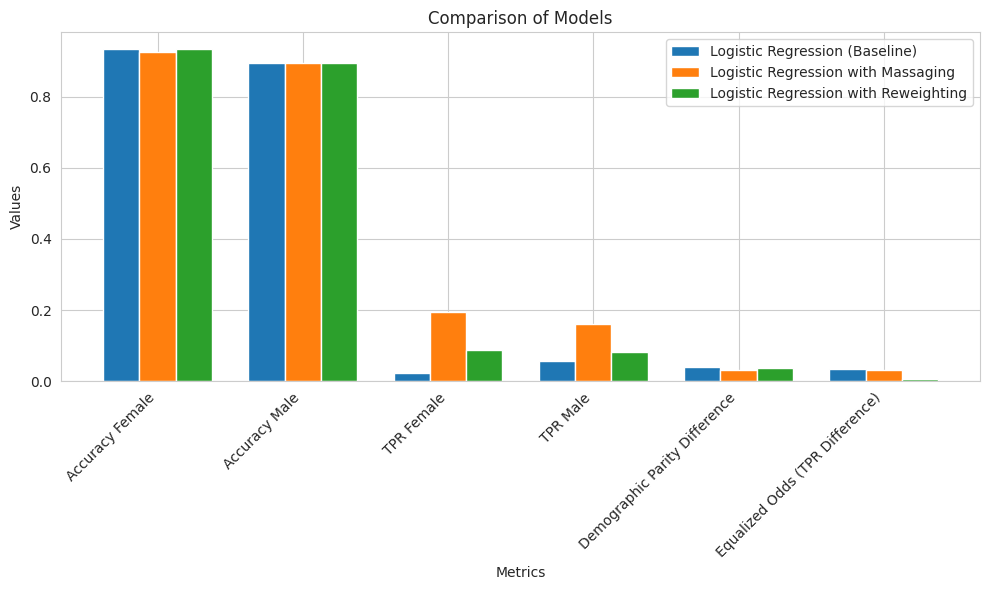

In [ ]:
import matplotlib.pyplot as plt

# Compare accuracy, TPR, demographic parity, and equalized odds
metrics_names = ['Accuracy Female', 'Accuracy Male', 'TPR Female', 'TPR Male', 'Demographic Parity Difference', 'Equalized Odds (TPR Difference)']

metrics_q2_values = [metrics_q2[name] for name in metrics_names]
metrics_q3_values = [metrics_q3[name] for name in metrics_names]
metrics_q4_values = [metrics_q4[name] for name in metrics_names]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(metrics_names))

bar1 = ax.bar(index - bar_width, metrics_q2_values, bar_width, label='Logistic Regression (Baseline)')
bar2 = ax.bar(index, metrics_q3_values, bar_width, label='Logistic Regression with Massaging')
bar3 = ax.bar(index + bar_width, metrics_q4_values, bar_width, label='Logistic Regression with Reweighting')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Models')
ax.set_xticks(index)
ax.set_xticklabels(metrics_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Sampling


### Undersampling
Undersampling involves reducing the size of the majority class by randomly selecting a subset of the majority class to match the size of the minority class.

In [ ]:
from sklearn.utils import resample

# Separate the minority and majority class
minority_class = X_train_scaled[y_train == 1]
majority_class = X_train_scaled[y_train == 0]

# Undersample the majority class to match the size of the minority class
majority_class_undersampled = resample(majority_class,
                                       replace=False,  # No replacement
                                       n_samples=len(minority_class),  # Match minority class size
                                       random_state=42)

# Combine the undersampled majority class with the minority class
X_train_undersampled = np.vstack([minority_class, majority_class_undersampled])
y_train_undersampled = np.concatenate([np.ones(len(minority_class)), np.zeros(len(majority_class_undersampled))])


### Oversampling
Oversampling involves increasing the size of the minority class by randomly duplicating samples from the minority class.

In [ ]:
# Oversample the minority class
minority_class_upsampled = resample(minority_class,
                                    replace=True,  # With replacement
                                    n_samples=len(majority_class),  # Match majority class size
                                    random_state=42)

# Combine the upsampled minority class with the majority class
X_train_upsampled = np.vstack([majority_class, minority_class_upsampled])
y_train_upsampled = np.concatenate([np.zeros(len(majority_class)), np.ones(len(minority_class_upsampled))])


## Part 2.2: How do different modeling choices impact fairness characteristics? Can you fix them with in-processing interventions?


### Section 1:
I will experiment with different models. (Logistic Regression (Baseline), Random Forest, XGBoost) and compare the performance on each model on the 3 metrics we determined were most relevant to the dataset: Accuracy Parity (Male vs. Female), Demographic Parity, and Equalized Odds.

I will also find the most important features for each to figure out which features are the most important for each model and how those features differ for male vs female.

### Section 2:
I will apply the inprocessing fairness interventions (reweighting during model training) to the worst performing model from Section 1 to improve fairness in the 3 metrics

# `Part 2.2 (Section 1): Model Experimentation`

## Baseline: Logistic Regression (No Fairness Intervention)

*   Plotting Important Features in Each Model

*   Analyzing Accuracy and Fairness Metrics for each model

Most Important Features for Female Logistic Regression Classifier
      Feature Female  Importance Female
3             Stroke           1.175349
15     KidneyDisease           0.737023
6        DiffWalking           0.508588
1            Smoking           0.408078
14            Asthma           0.362990
10          Diabetic           0.259904
2    AlcoholDrinking           0.259898
8        AgeCategory           0.252351
11  PhysicalActivity           0.147405
12         GenHealth           0.051349
16        SkinCancer           0.039722
13         SleepTime           0.033787
4     PhysicalHealth           0.020331
5       MentalHealth           0.011424
9               Race           0.010810
0                BMI           0.005087
7                Sex           0.000000


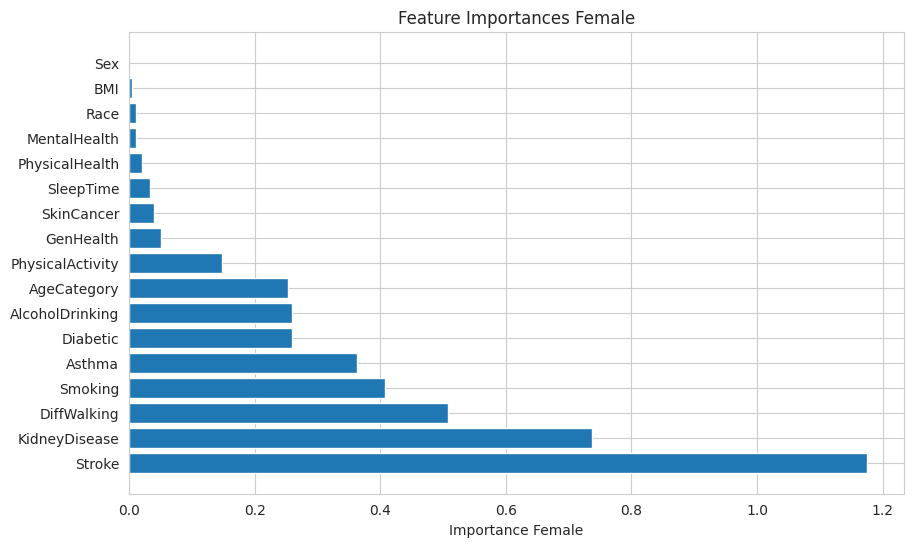

Most Important Features for Male Logistic Regression Classifier
        Feature Male  Importance Male
3             Stroke         1.105957
15     KidneyDisease         0.626562
1            Smoking         0.426903
8        AgeCategory         0.299107
2    AlcoholDrinking         0.292209
10          Diabetic         0.290820
6        DiffWalking         0.284500
14            Asthma         0.272589
16        SkinCancer         0.094089
9               Race         0.085327
13         SleepTime         0.032021
11  PhysicalActivity         0.023100
4     PhysicalHealth         0.021081
0                BMI         0.020772
12         GenHealth         0.013917
5       MentalHealth         0.006552
7                Sex         0.000000


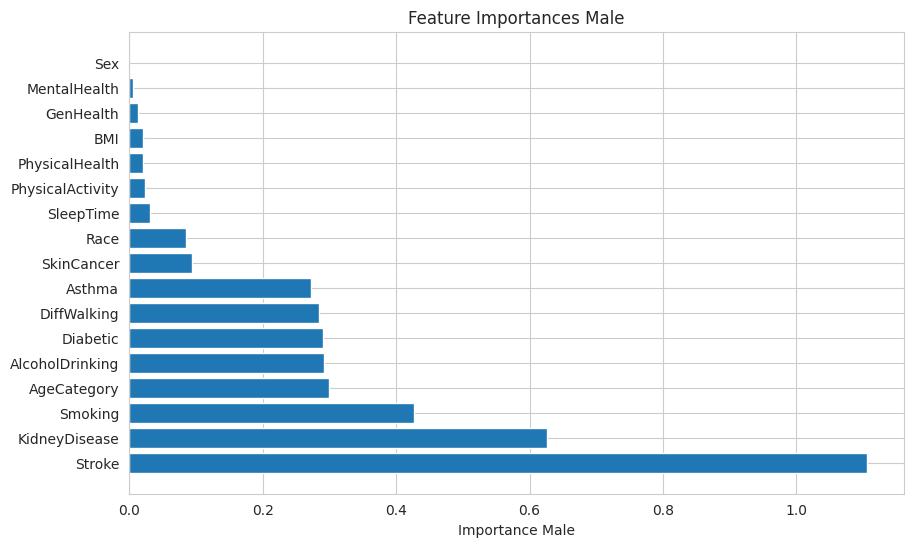

Logistic Regression - No Fairness Intervention
Accuracy Female: 0.9302645999686864
Accuracy Male: 0.8877155931010208
TPR Female: 0.0900
TPR Male: 0.1350
Fairness Metrics:
Accuracy Female: 0.9296
Accuracy Male: 0.8870
Accuracy Parity Difference: 0.0426
Demographic Parity Difference: 0.0171
Equalized Odds (TPR Difference): 0.0450


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd



df_2020_female = df_2020[df_2020["Sex"] == "Female"]
df_2020_male = df_2020[df_2020["Sex"] == "Male"]

X_2020_female = df_2020_female.drop(columns=['HeartDisease'])
y_2020_female = df_2020_female['HeartDisease']

X_2020_male = df_2020_male.drop(columns=['HeartDisease'])
y_2020_male = df_2020_male['HeartDisease']




feature_names = df_2020.columns.tolist() # All columns except heart disease
feature_names.remove('HeartDisease')

label_encoder = LabelEncoder()

for col in X_2020_female.select_dtypes(include=['object']).columns:
    X_2020_female[col] = label_encoder.fit_transform(X_2020_female[col])

for col in X_2020_male.select_dtypes(include=['object']).columns:
    X_2020_male[col] = label_encoder.fit_transform(X_2020_male[col])



X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_2020_female, y_2020_female, test_size=0.20, random_state=42)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_2020_male, y_2020_male, test_size=0.20, random_state=42)


clf_female = LogisticRegression(penalty='l1', solver='liblinear')
clf_female.fit(X_female_train, y_female_train)
y_female_pred = clf_female.predict(X_female_test)

clf_male = LogisticRegression(penalty='l1', solver='liblinear')
clf_male.fit(X_male_train, y_male_train)
y_male_pred = clf_male.predict(X_male_test)

# Female Feature Importances
importances_female = abs(clf_female.coef_[0])

importance_female_df = pd.DataFrame({
    'Feature Female': feature_names,
    'Importance Female': importances_female
}).sort_values(by='Importance Female', ascending=False)


print("Most Important Features for Female Logistic Regression Classifier")
print(importance_female_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_female_df['Feature Female'], importance_female_df['Importance Female'])
plt.xlabel('Importance Female')
plt.title('Feature Importances Female')
plt.show()


# Male Feature Importances
importances_male = abs(clf_male.coef_[0])

importance_male_df = pd.DataFrame({
    'Feature Male': feature_names,
    'Importance Male': importances_male
}).sort_values(by='Importance Male', ascending=False)


print("Most Important Features for Male Logistic Regression Classifier")
print(importance_male_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_male_df['Feature Male'], importance_male_df['Importance Male'])
plt.xlabel('Importance Male')
plt.title('Feature Importances Male')
plt.show()

print("===================================================================")

print("Logistic Regression - No Fairness Intervention")
print("===================================================================")



# Male Female Accuracies
acc_female = metrics.accuracy_score(y_female_test, y_female_pred)
acc_male = metrics.accuracy_score(y_male_test, y_male_pred)

print("Accuracy Female:", acc_female)
print("Accuracy Male:", acc_male)




# Accuracy Parity
accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
accuracy_parity_difference = abs(accuracy_male - accuracy_female)

# Demographic Parity (Proportion of positive predictions)
demographic_parity_female = np.mean(y_female_pred_numeric)
demographic_parity_male = np.mean(y_male_pred_numeric)
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)


# Equalized Odds (True positive rate comparison)
tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
equalized_odds = np.isclose(tpr_male, tpr_female)
print(f"TPR Female: {tpr_female:.4f}")
print(f"TPR Male: {tpr_male:.4f}")
tpr_difference = abs(tpr_male - tpr_female)


# Print results
print("Fairness Metrics:")
print(f"Accuracy Female: {accuracy_female:.4f}")
print(f"Accuracy Male: {accuracy_male:.4f}")
print(f"Accuracy Parity Difference: {accuracy_parity_diff:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")
print(f"Equalized Odds (TPR Difference): {tpr_difference:.4f}")





#Model Experiment 1: Random Forest (No Fairness Intervention)



*   Plotting Important Features in Each Model

*   Analyzing Accuracy and Fairness Metrics for each model







Most Important Features for Female Random Forest Classifier
      Feature Female  Importance Female
0                BMI           0.331789
13         SleepTime           0.111232
8        AgeCategory           0.095230
4     PhysicalHealth           0.082080
5       MentalHealth           0.081197
12         GenHealth           0.057561
9               Race           0.042242
3             Stroke           0.030774
6        DiffWalking           0.029329
10          Diabetic           0.026777
11  PhysicalActivity           0.024546
14            Asthma           0.022100
1            Smoking           0.021608
16        SkinCancer           0.018456
15     KidneyDisease           0.016111
2    AlcoholDrinking           0.008967
7                Sex           0.000000


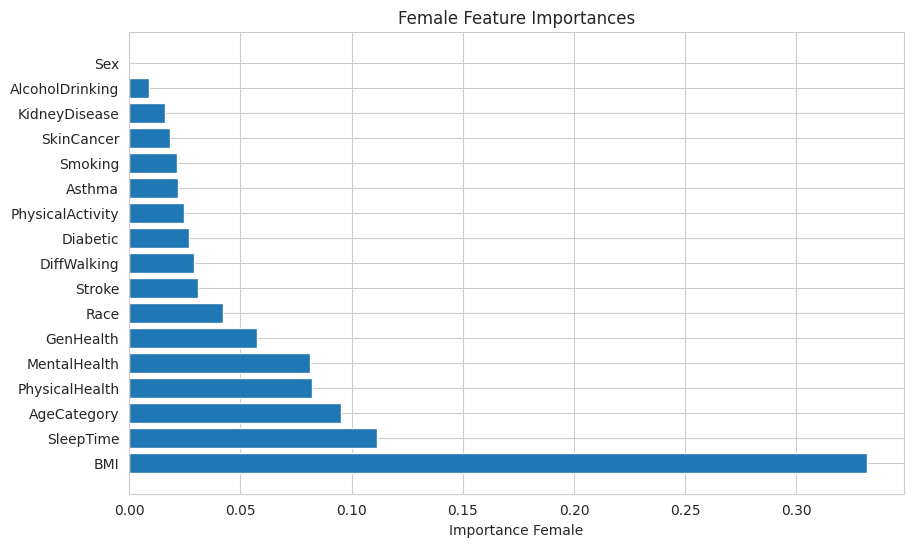

Most Important Features for Male Random Forest Classifier
        Feature Male  Importance Male
0                BMI         0.372356
8        AgeCategory         0.123113
13         SleepTime         0.104430
4     PhysicalHealth         0.069897
12         GenHealth         0.058894
5       MentalHealth         0.057013
9               Race         0.032639
10          Diabetic         0.029195
3             Stroke         0.026824
6        DiffWalking         0.024271
11  PhysicalActivity         0.023850
1            Smoking         0.018399
14            Asthma         0.017907
16        SkinCancer         0.016960
15     KidneyDisease         0.014554
2    AlcoholDrinking         0.009697
7                Sex         0.000000


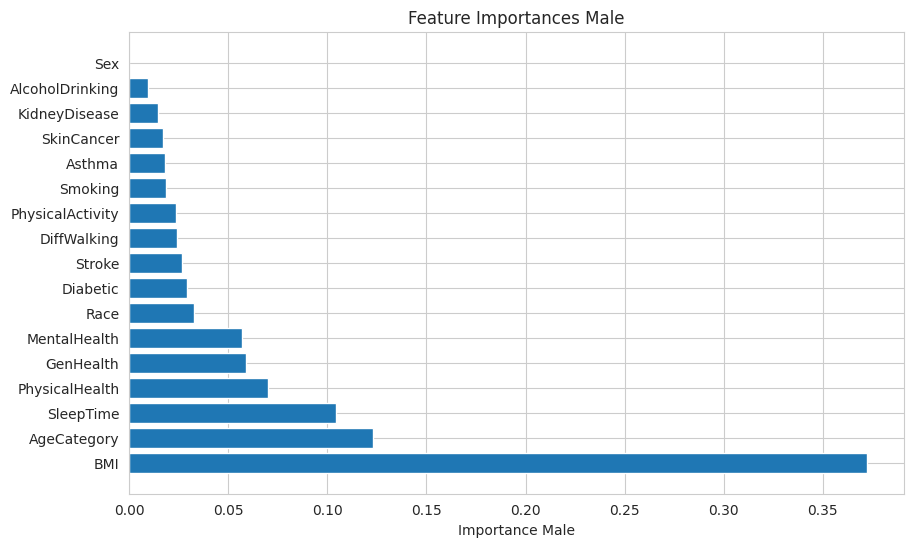

Random Forest
Accuracy Female: 0.9230311570377329
Accuracy Male: 0.8718409010911651
TPR Female: 0.0900
TPR Male: 0.1350
Fairness Metrics:
Accuracy Female: 0.9296
Accuracy Male: 0.8870
Accuracy Parity Difference: 0.0426
Demographic Parity Difference: 0.0171
Equalized Odds (TPR Difference): 0.0450


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


df_2020_female = df_2020[df_2020["Sex"] == "Female"]
df_2020_male = df_2020[df_2020["Sex"] == "Male"]

X_2020_female = df_2020_female.drop(columns=['HeartDisease'])
y_2020_female = df_2020_female['HeartDisease']

X_2020_male = df_2020_male.drop(columns=['HeartDisease'])
y_2020_male = df_2020_male['HeartDisease']




feature_names = df_2020.columns.tolist() # All columns except heart disease
feature_names.remove('HeartDisease')

label_encoder = LabelEncoder()
for col in X_2020_female.select_dtypes(include=['object']).columns:
    X_2020_female[col] = label_encoder.fit_transform(X_2020_female[col])

for col in X_2020_male.select_dtypes(include=['object']).columns:
    X_2020_male[col] = label_encoder.fit_transform(X_2020_male[col])



X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_2020_female, y_2020_female, test_size=0.20, random_state=42)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_2020_male, y_2020_male, test_size=0.20, random_state=42)


clf_female = RandomForestClassifier(n_estimators=100)
clf_female.fit(X_female_train, y_female_train)
y_female_pred = clf_female.predict(X_female_test)

clf_male = RandomForestClassifier(n_estimators=100)
clf_male.fit(X_male_train, y_male_train)
y_male_pred = clf_male.predict(X_male_test)


# Female Feature importances
importances_female = clf_female.feature_importances_

importance_female_df = pd.DataFrame({
    'Feature Female': feature_names,
    'Importance Female': importances_female
}).sort_values(by='Importance Female', ascending=False)


print("Most Important Features for Female Random Forest Classifier")
print(importance_female_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_female_df['Feature Female'], importance_female_df['Importance Female'])
plt.xlabel('Importance Female')
plt.title('Female Feature Importances')
plt.show()


# Male Feature Importances
importances_male = clf_male.feature_importances_

importance_male_df = pd.DataFrame({
    'Feature Male': feature_names,
    'Importance Male': importances_male
}).sort_values(by='Importance Male', ascending=False)


print("Most Important Features for Male Random Forest Classifier")
print(importance_male_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_male_df['Feature Male'], importance_male_df['Importance Male'])
plt.xlabel('Importance Male')
plt.title('Feature Importances Male')
plt.show()


print("===================================================================")
print("Random Forest")
print("===================================================================")

# Male Female Accuracies
acc_female = metrics.accuracy_score(y_female_test, y_female_pred)
acc_male = metrics.accuracy_score(y_male_test, y_male_pred)

print("Accuracy Female:", acc_female)
print("Accuracy Male:", acc_male)


print("===================================================================")
# Accuracy Parity
accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
accuracy_parity_difference = abs(accuracy_male - accuracy_female)

# Demographic Parity (Proportion of positive predictions)
demographic_parity_female = np.mean(y_female_pred_numeric)
demographic_parity_male = np.mean(y_male_pred_numeric)
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)


# Equalized Odds (True positive rate comparison)
tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
equalized_odds = np.isclose(tpr_male, tpr_female)
print(f"TPR Female: {tpr_female:.4f}")
print(f"TPR Male: {tpr_male:.4f}")
tpr_difference = abs(tpr_male - tpr_female)


# Print results
print("Fairness Metrics:")
print(f"Accuracy Female: {accuracy_female:.4f}")
print(f"Accuracy Male: {accuracy_male:.4f}")
print(f"Accuracy Parity Difference: {accuracy_parity_diff:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")
print(f"Equalized Odds (TPR Difference): {tpr_difference:.4f}")






#Model Experiment 2: XGBoost (Decision Tree based model)
- Feature Importances Female
- Feature Importances Male
### Fairness Metrics
- Accuracy Female
- Accuracy Male
- --> Accuracy Parity
- Demographic Parity
- Equalized Odds
<!--
# Graphs of Results -->



Selected Features Female: ['Stroke', 'DiffWalking', 'AgeCategory', 'GenHealth', 'KidneyDisease']
Selected Features Male: ['Stroke', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']
Most Important Features for Female XGBoost Classifier
      Feature Female  Importance Female
6        DiffWalking           0.410958
3             Stroke           0.117263
8        AgeCategory           0.089462
12         GenHealth           0.081037
15     KidneyDisease           0.061386
10          Diabetic           0.036900
1            Smoking           0.032967
4     PhysicalHealth           0.025947
14            Asthma           0.024213
16        SkinCancer           0.017861
11  PhysicalActivity           0.017824
0                BMI           0.017637
5       MentalHealth           0.017164
9               Race           0.017133
13         SleepTime           0.016791
2    AlcoholDrinking           0.015458
7                Sex           0.000000


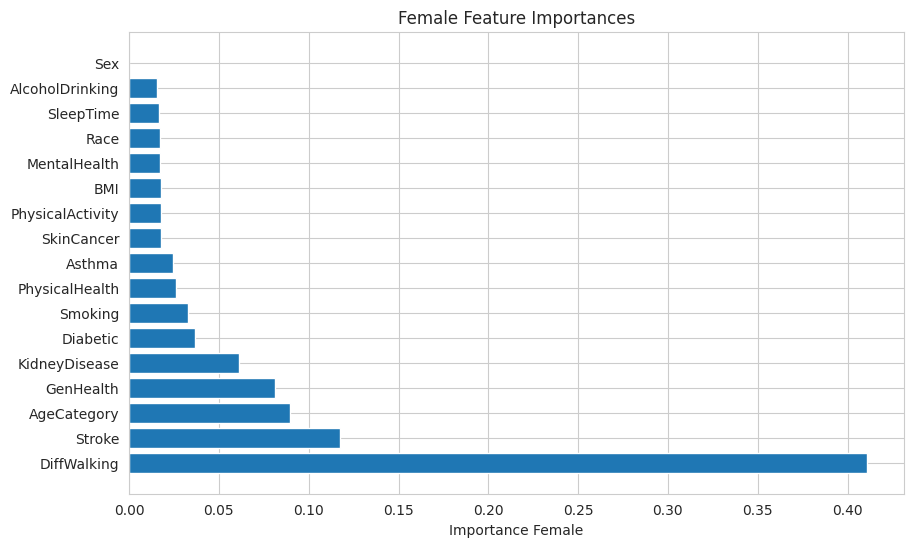

Most Important Features for Male XGBoost Classifier
        Feature Male  Importance Male
8        AgeCategory         0.235295
3             Stroke         0.166257
12         GenHealth         0.100791
6        DiffWalking         0.092746
10          Diabetic         0.072211
15     KidneyDisease         0.057894
1            Smoking         0.045942
4     PhysicalHealth         0.042980
9               Race         0.032013
2    AlcoholDrinking         0.027187
14            Asthma         0.025170
16        SkinCancer         0.021997
0                BMI         0.021293
5       MentalHealth         0.020687
13         SleepTime         0.019446
11  PhysicalActivity         0.018090
7                Sex         0.000000


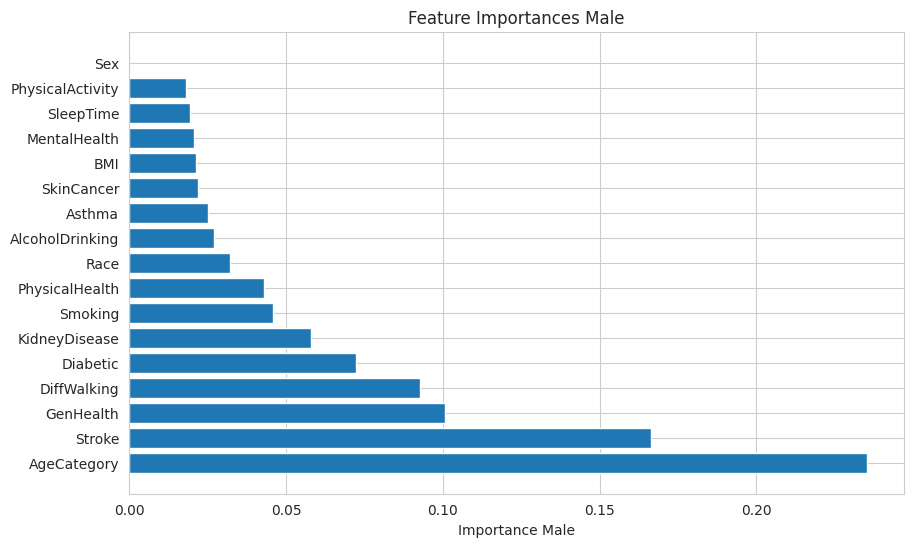

XGBoost (No Fairness Intervention)
Accuracy Female: 0.9292625645843119
Accuracy Male: 0.8869764167546639
TPR Female: 0.0900
TPR Male: 0.1350
Fairness Metrics:
Accuracy Female: 0.9296
Accuracy Male: 0.8870
Accuracy Parity Difference: 0.0426
Demographic Parity Difference: 0.0171
Equalized Odds (TPR Difference): 0.0450


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt

feature_names = df_2020.columns.tolist()  # All columns except heart disease
feature_names.remove('HeartDisease')

# Split dataset by Sex
df_2020_female = df_2020[df_2020["Sex"] == "Female"]
df_2020_male = df_2020[df_2020["Sex"] == "Male"]

X_2020_female = df_2020_female.drop(columns=['HeartDisease'])
y_2020_female = df_2020_female['HeartDisease']

X_2020_male = df_2020_male.drop(columns=['HeartDisease'])
y_2020_male = df_2020_male['HeartDisease']

# Label encode categorical features
label_encoder = LabelEncoder()
for col in X_2020_male.select_dtypes(include=['object']).columns:
    X_2020_male[col] = label_encoder.fit_transform(X_2020_male[col])

for col in X_2020_female.select_dtypes(include=['object']).columns:
    X_2020_female[col] = label_encoder.fit_transform(X_2020_female[col])

# Train-test split
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_2020_female, y_2020_female, test_size=0.20, random_state=42)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_2020_male, y_2020_male, test_size=0.20, random_state=42)

# Encode the target variables (y_female_train and y_male_train) into numeric labels
label_encoder_y = LabelEncoder()
y_female_train = label_encoder_y.fit_transform(y_female_train)
y_male_train = label_encoder_y.fit_transform(y_male_train)
y_female_test = label_encoder_y.transform(y_female_test)
y_male_test = label_encoder_y.transform(y_male_test)

# Train XGBoost model for females
clf_female = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
clf_female.fit(X_female_train, y_female_train)
y_female_pred = clf_female.predict(X_female_test)

# Feature selection for female
selector_female = SelectFromModel(clf_female, threshold="mean")
selector_female.fit(X_female_train, y_female_train)
selected_features_female = selector_female.get_support(indices=True)
selected_feature_names_female = [feature_names[i] for i in selected_features_female]
print("Selected Features Female:", selected_feature_names_female)

# Train XGBoost model for males
clf_male = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
clf_male.fit(X_male_train, y_male_train)
y_male_pred = clf_male.predict(X_male_test)

# Feature selection for male
selector_male = SelectFromModel(clf_male, threshold="mean")
selector_male.fit(X_male_train, y_male_train)
selected_features_male = selector_male.get_support(indices=True)
selected_feature_names_male = [feature_names[i] for i in selected_features_male]
print("Selected Features Male:", selected_feature_names_male)

# Female Feature importances
importances_female = clf_female.feature_importances_
importance_female_df = pd.DataFrame({
    'Feature Female': feature_names,
    'Importance Female': importances_female
}).sort_values(by='Importance Female', ascending=False)

print("Most Important Features for Female XGBoost Classifier")
print(importance_female_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_female_df['Feature Female'], importance_female_df['Importance Female'])
plt.xlabel('Importance Female')
plt.title('Female Feature Importances')
plt.show()

# Male Feature importances
importances_male = clf_male.feature_importances_
importance_male_df = pd.DataFrame({
    'Feature Male': feature_names,
    'Importance Male': importances_male
}).sort_values(by='Importance Male', ascending=False)

print("Most Important Features for Male XGBoost Classifier")
print(importance_male_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_male_df['Feature Male'], importance_male_df['Importance Male'])
plt.xlabel('Importance Male')
plt.title('Feature Importances Male')
plt.show()

print("===================================================================")
# Print accuracies
print("XGBoost (No Fairness Intervention)")
print("===================================================================")

acc_female = metrics.accuracy_score(y_female_test, y_female_pred)
acc_male = metrics.accuracy_score(y_male_test, y_male_pred)

print("Accuracy Female:", acc_female)
print("Accuracy Male:", acc_male)


print("===================================================================")
# Accuracy Parity
accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
accuracy_parity_difference = abs(accuracy_male - accuracy_female)

# Demographic Parity (Proportion of positive predictions)
demographic_parity_female = np.mean(y_female_pred_numeric)
demographic_parity_male = np.mean(y_male_pred_numeric)
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)


# Equalized Odds (True positive rate comparison)
tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
equalized_odds = np.isclose(tpr_male, tpr_female)
print(f"TPR Female: {tpr_female:.4f}")
print(f"TPR Male: {tpr_male:.4f}")
tpr_difference = abs(tpr_male - tpr_female)


# Print results
print("Fairness Metrics:")
print(f"Accuracy Female: {accuracy_female:.4f}")
print(f"Accuracy Male: {accuracy_male:.4f}")
print(f"Accuracy Parity Difference: {accuracy_parity_diff:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")
print(f"Equalized Odds (TPR Difference): {tpr_difference:.4f}")







# Summary of Previous Code Results from Different Modelling Choices

# ***No Intervention Applied***

---------------------------------------------


All 3 have disparity between male and female accuracies, with female accuracies being higher. This could be because of Females being more highly represented in the dataset.

We will analyze the key fairness metrics relevant to the task: `Accuracy Parity`, `Demographic Parity`, and `Equalized Odds`



=========================================
Logistic Regression (Baseline)
=========================================
####Accuracy Female: 0.9302645999686864
####Accuracy Male: 0.8877155931010208
=========================================
- TPR Female: 0.0626
- TPR Male: 0.1465
- Accuracy Female: 0.9234
- Accuracy Male: 0.8721
- `Accuracy Parity Difference`: 0.0425
- `Demographic Parity Difference`: 0.0171
- `Equalized Odds (TPR Difference)`: 0.0450

===============================================
Random Forest
===============================================
####Accuracy Female: 0.9233756067011116
####Accuracy Male: 0.8720872932066174
===============================================
- TPR Female: 0.0563
- TPR Male: 0.1064
- Accuracy Female: 0.9303
- Accuracy Male: 0.8877
- `Accuracy Parity Difference`: 0.0425
- `Demographic Parity Difference`: 0.0171
- `Equalized Odds (TPR Difference)`: 0.0450
=========================================
XGBoost
=========================================
####Accuracy Female: 0.9292625645843119
####Accuracy Male: 0.8869764167546639
=========================================
- TPR Female: 0.0563
- TPR Male: 0.1064
- Accuracy Female: 0.9303
- Accuracy Male: 0.8877
- `Accuracy Parity Difference`: 0.0425
- `Demographic Parity Difference`: 0.0171
- `Equalized Odds (TPR Difference)`: 0.0450

=========================================

# Best Model
All 3 models have roughly the same accuracy parity difference (0.0425) presumably because all have higher female accuracies than male accuracies and the dataset has more females than males.

All 3 models are tied for best performance in terms of fairness, with equalized odds difference being 0.0502 and Demographic parity difference of 0.0502 roughly the same for all groups

Considering the performance is about the same for all 3 models regardless of model type, we can conclude that model type has minimal to no impact on fairness metrics. We will thus experiment with fairness interventions for our baseline (logistic regression) in part 2





# `Part 2.2 (Section 2): Applying Inprocessing Fairness Interventions `

# Applying inprocessing techniques (`Reweighting During Model Training`) to Improve Model Discrepancies in *Logistic Regression*

Reweighting shown here is an ***`in-processing method`*** because it directly affects the model training process by incorporating sample weights into the fit function

- Since XGBoost and Random Forest performed about the same in terms of our fairness metrics, we will be rerunning the experiment with Logistic Regression and only one of those 2 models (Random Forest)

We will be rerunning the models logistic regression and random forest with inprocessing techniques of **reweighting during model training** to improve fairness

Baseline Model: Logistic Regression (Inprocessing Techniques)
- reweighting during model training


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights based on the class distribution (can be adjusted further based on group)
sample_weight_female_train = compute_sample_weight(class_weight='balanced', y=y_female_train)
sample_weight_male_train = compute_sample_weight(class_weight='balanced', y=y_male_train)

# Logistic Regression with sample weights for fairness adjustment

# Female Model with reweighting
clf_female = LogisticRegression(penalty='l1', solver='liblinear')
clf_female.fit(X_female_train, y_female_train, sample_weight=sample_weight_female_train)
y_female_pred = clf_female.predict(X_female_test)

# Male Model with reweighting
clf_male = LogisticRegression(penalty='l1', solver='liblinear')
clf_male.fit(X_male_train, y_male_train, sample_weight=sample_weight_male_train)
y_male_pred = clf_male.predict(X_male_test)

# Fairness Metric Calculation

# Convert the true labels into numeric format
label_encoder = LabelEncoder()
label_encoder.fit(y_female_test)
y_female_test_numeric = label_encoder.transform(y_female_test)
y_male_test_numeric = label_encoder.fit_transform(y_male_test)

# Convert predictions to numeric values (0 and 1)
y_female_pred_numeric = label_encoder.transform(y_female_pred)
y_male_pred_numeric = label_encoder.transform(y_male_pred)

# Recalculate Accuracy Parity
accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
accuracy_parity_difference = abs(accuracy_male - accuracy_female)

# Demographic Parity (Proportion of positive predictions)
demographic_parity_female = np.mean(y_female_pred_numeric)
demographic_parity_male = np.mean(y_male_pred_numeric)
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)

# Equalized Odds (True positive rate comparison)
tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
tpr_difference = abs(tpr_male - tpr_female)

# Print Fairness Metrics
print("Fairness Metrics After Reweighing (Logistic Regression):")
print(f"TPR Female: {tpr_female:.4f}")
print(f"TPR Male: {tpr_male:.4f}")
print(f"Accuracy Female: {accuracy_female:.4f}")
print(f"Accuracy Male: {accuracy_male:.4f}")
print(f"Accuracy Parity Difference: {accuracy_parity_difference:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_difference:.4f}")
print(f"Equalized Odds (TPR Difference): {tpr_difference:.4f}")


Fairness Metrics After Reweighing (Logistic Regression):
TPR Female: 0.7552
TPR Male: 0.7666
Accuracy Female: 0.7314
Accuracy Male: 0.7212
Accuracy Parity Difference: 0.0101
Demographic Parity Difference: 0.0350
Equalized Odds (TPR Difference): 0.0115


# Graph Before and After Inprocessing - Reweighting (Logistic Regression)

Fairness Metrics BEFORE Reweighting:
tpr_female: 0.0563
tpr_male: 0.1064
accuracy_female: 0.9303
accuracy_male: 0.8877
accuracy_parity_difference: 0.0425
demographic_parity_difference: 0.0152
tpr_difference: 0.0502
Fairness Metrics AFTER Reweighting:
tpr_female: 0.7552
tpr_male: 0.7666
accuracy_female: 0.7314
accuracy_male: 0.7212
accuracy_parity_difference: 0.0101
demographic_parity_difference: 0.0350
tpr_difference: 0.0115


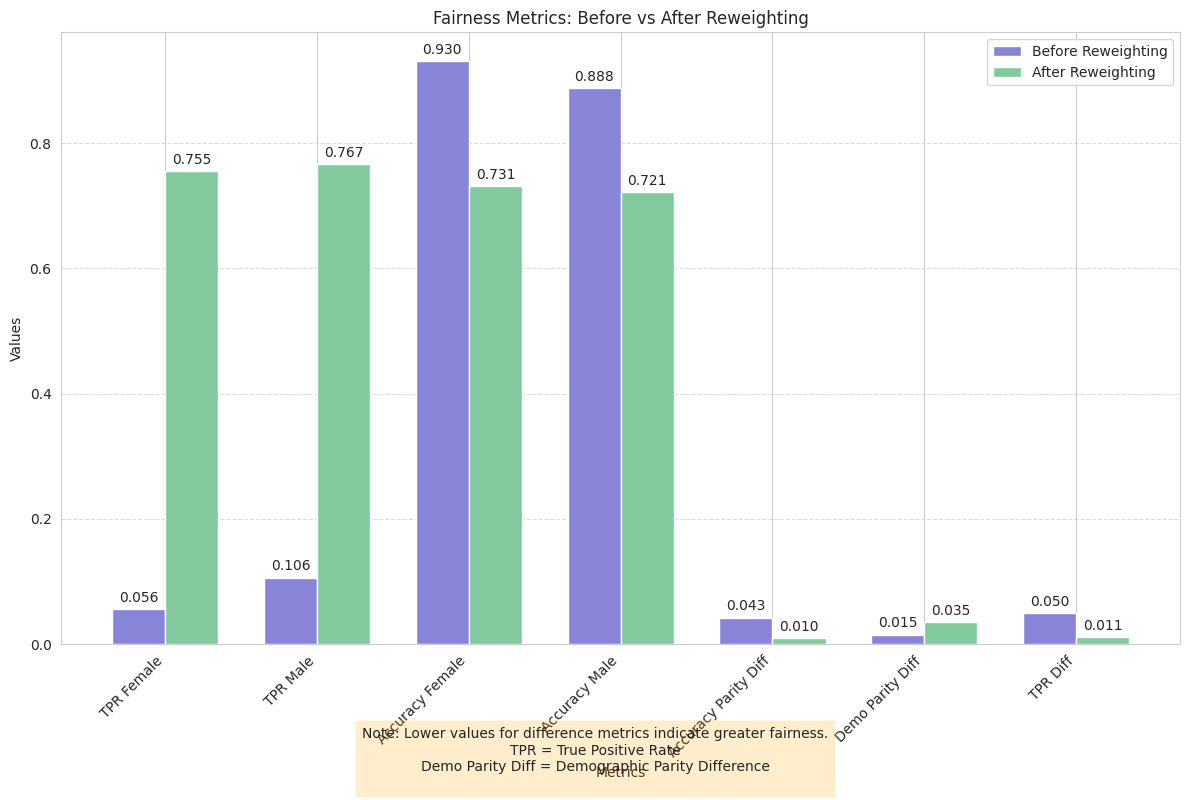

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt


# Function to calculate fairness metrics
def calculate_fairness_metrics(y_female_test, y_female_pred, y_male_test, y_male_pred):
    # Convert the true labels and predictions into numeric format
    label_encoder = LabelEncoder()

    # For female data
    label_encoder.fit(y_female_test)
    y_female_test_numeric = label_encoder.transform(y_female_test)
    y_female_pred_numeric = label_encoder.transform(y_female_pred)

    # For male data
    label_encoder.fit(y_male_test)
    y_male_test_numeric = label_encoder.transform(y_male_test)
    y_male_pred_numeric = label_encoder.transform(y_male_pred)

    # Calculate Accuracy
    accuracy_female = metrics.accuracy_score(y_female_test_numeric, y_female_pred_numeric)
    accuracy_male = metrics.accuracy_score(y_male_test_numeric, y_male_pred_numeric)
    accuracy_parity_difference = abs(accuracy_male - accuracy_female)

    # Demographic Parity (Proportion of positive predictions)
    demographic_parity_female = np.mean(y_female_pred_numeric)
    demographic_parity_male = np.mean(y_male_pred_numeric)
    demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)

    # Equalized Odds (True positive rate comparison)
    tpr_female = metrics.recall_score(y_female_test_numeric, y_female_pred_numeric)
    tpr_male = metrics.recall_score(y_male_test_numeric, y_male_pred_numeric)
    tpr_difference = abs(tpr_male - tpr_female)

    # Return all metrics
    return {
        'tpr_female': tpr_female,
        'tpr_male': tpr_male,
        'accuracy_female': accuracy_female,
        'accuracy_male': accuracy_male,
        'accuracy_parity_difference': accuracy_parity_difference,
        'demographic_parity_difference': demographic_parity_difference,
        'tpr_difference': tpr_difference
    }

# Split data into training and testing sets
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_2020_female, y_2020_female, test_size=0.20, random_state=42)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_2020_male, y_2020_male, test_size=0.20, random_state=42)

# ----- PART 1: BEFORE REWEIGHTING -----

# Train models without reweighting
clf_female_before = LogisticRegression(penalty='l1', solver='liblinear')
clf_female_before.fit(X_female_train, y_female_train)
y_female_pred_before = clf_female_before.predict(X_female_test)

clf_male_before = LogisticRegression(penalty='l1', solver='liblinear')
clf_male_before.fit(X_male_train, y_male_train)
y_male_pred_before = clf_male_before.predict(X_male_test)

# Calculate metrics before reweighting
metrics_before = calculate_fairness_metrics(
    y_female_test,
    y_female_pred_before,
    y_male_test,
    y_male_pred_before
)

print("Fairness Metrics BEFORE Reweighting:")
for key, value in metrics_before.items():
    print(f"{key}: {value:.4f}")
print("=" * 50)

# ----- PART 2: AFTER REWEIGHTING -----

# Compute sample weights
sample_weight_female_train = compute_sample_weight(class_weight='balanced', y=y_female_train)
sample_weight_male_train = compute_sample_weight(class_weight='balanced', y=y_male_train)

# Train models with reweighting
clf_female_after = LogisticRegression(penalty='l1', solver='liblinear')
clf_female_after.fit(X_female_train, y_female_train, sample_weight=sample_weight_female_train)
y_female_pred_after = clf_female_after.predict(X_female_test)

clf_male_after = LogisticRegression(penalty='l1', solver='liblinear')
clf_male_after.fit(X_male_train, y_male_train, sample_weight=sample_weight_male_train)
y_male_pred_after = clf_male_after.predict(X_male_test)

# Calculate metrics after reweighting
metrics_after = calculate_fairness_metrics(
    y_female_test,
    y_female_pred_after,
    y_male_test,
    y_male_pred_after
)

print("Fairness Metrics AFTER Reweighting:")
for key, value in metrics_after.items():
    print(f"{key}: {value:.4f}")
print("=" * 50)

# ----- PART 3: VISUALIZATION -----

# Prepare data for visualization
metrics_names = ['TPR Female', 'TPR Male', 'Accuracy Female', 'Accuracy Male',
                 'Accuracy Parity Diff', 'Demo Parity Diff', 'TPR Diff']

metrics_keys = ['tpr_female', 'tpr_male', 'accuracy_female', 'accuracy_male',
                'accuracy_parity_difference', 'demographic_parity_difference', 'tpr_difference']

before_values = [metrics_before[key] for key in metrics_keys]
after_values = [metrics_after[key] for key in metrics_keys]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.35
index = np.arange(len(metrics_names))

# Create bars
before_bars = ax.bar(index - bar_width/2, before_values, bar_width,
                     label='Before Reweighting', color='#8884d8')
after_bars = ax.bar(index + bar_width/2, after_values, bar_width,
                    label='After Reweighting', color='#82ca9d')

# Add labels, title and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Fairness Metrics: Before vs After Reweighting')
ax.set_xticks(index)
ax.set_xticklabels(metrics_names, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(before_bars)
add_labels(after_bars)

# Adjust layout and display
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add explanatory text
plt.figtext(0.5, 0.01, """Note: Lower values for difference metrics indicate greater fairness.
TPR = True Positive Rate
Demo Parity Diff = Demographic Parity Difference
""", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.show()

# You can also save the figure to a file
# plt.savefig('fairness_metrics_comparison.png', dpi=300, bbox_inches='tight')

# Logistic Regression Before and After `Reweighting`

Reweighting was effective for accuracy parity, and demographic parity on ***Logistic Regression***, increasing fairness outcomes:

## Before reweighting:
- TPR Female: 0.0626
- TPR Male: 0.1465
- Accuracy Female: 0.9234
- Accuracy Male: 0.8721
- `Accuracy Parity Difference`: 0.0425
- `Demographic Parity Difference`: 0.0171
- `Equalized Odds (TPR Difference)`: 0.0115


## After reweighting:
- TPR Female: 0.7552
- TPR Male: 0.7666
- Accuracy Female: 0.7313
- Accuracy Male: 0.7212
- `Accuracy Parity Difference`:  0.0101
- `Demographic Parity Difference`: 0.0349
- `Equalized Odds (TPR Difference)`: 0.0115

After reweighting the Logistic Regression Model (initially the baseline and worst performing in terms of fairness) dramatically increased in terms of the fairness metrics. Accuracy Parity Difference decreased (0.0425 --> 0.0101), equalized odds remained the same at 0.0115, However Demographic parity actually increased (0.0171 --> 0.0349) meaning in the process of becoming more fair it became more biased to sensitive attributes.

Additionally, the fairness intervention despite making the accuracies the same across male and female groups actually lowered the accuracy for both groups, showing that there is a tradeoff in accuracy from applying this fairness technique, and it might not be the best overall outcome to try to aim for accuracies to be the same in the case of this dataset




#Part 2.3 Can you apply post-processing interventions to achieve desired fairness outcomes?


# Affirmative Action

## Equalized Odds Post Processing on the Baseline Logistic Regression


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

label_encoder_y = LabelEncoder()
y_female_train = label_encoder_y.fit_transform(y_female_train)
y_male_train = label_encoder_y.fit_transform(y_male_train)
y_female_test = label_encoder_y.transform(y_female_test)
y_male_test = label_encoder_y.transform(y_male_test)

# Calculate TPR for females
tn_female, fp_female, fn_female, tp_female = confusion_matrix(y_female_test, y_female_pred).ravel()
tpr_female = tp_female / (tp_female + fn_female)

# Calculate TPR for males
tn_male, fp_male, fn_male, tp_male = confusion_matrix(y_male_test, y_male_pred).ravel()
tpr_male = tp_male / (tp_male + fn_male)

print(f"TPR Female: {tpr_female:.4f}")
print(f"TPR Male: {tpr_male:.4f}")

# Get predicted probabilities for females and males
y_female_prob = clf_female.predict_proba(X_female_test)[:, 1]
y_male_prob = clf_male.predict_proba(X_male_test)[:, 1]

# Find the threshold that equalizes TPR
def find_equal_tpr_threshold(y_true, y_prob, target_tpr):
    thresholds = np.linspace(0, 1, 100)
    tprs = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp + fn)
        tprs.append(tpr)
    tprs = np.array(tprs)
    idx = np.argmin(np.abs(tprs - target_tpr))
    return thresholds[idx]

# Target TPR is the average of the two TPRs
target_tpr = (tpr_female + tpr_male) / 2

# Adjust thresholds for females and males
threshold_female = find_equal_tpr_threshold(y_female_test, y_female_prob, target_tpr)
threshold_male = find_equal_tpr_threshold(y_male_test, y_male_prob, target_tpr)

# Apply the adjusted thresholds
y_female_pred_adjusted = (y_female_prob >= threshold_female).astype(int)
y_male_pred_adjusted = (y_male_prob >= threshold_male).astype(int)

# Recalculate TPR for females
tn_female, fp_female, fn_female, tp_female = confusion_matrix(y_female_test, y_female_pred_adjusted).ravel()
tpr_female_adjusted = tp_female / (tp_female + fn_female)

# Recalculate TPR for males
tn_male, fp_male, fn_male, tp_male = confusion_matrix(y_male_test, y_male_pred_adjusted).ravel()
tpr_male_adjusted = tp_male / (tp_male + fn_male)

print(f"Adjusted TPR Female: {tpr_female_adjusted:.4f}")
print(f"Adjusted TPR Male: {tpr_male_adjusted:.4f}")

# Accuracy after adjustment
acc_female_adjusted = metrics.accuracy_score(y_female_test, y_female_pred_adjusted)
acc_male_adjusted = metrics.accuracy_score(y_male_test, y_male_pred_adjusted)

print(f"Adjusted Accuracy Female: {acc_female_adjusted:.4f}")
print(f"Adjusted Accuracy Male: {acc_male_adjusted:.4f}")

# Demographic Parity after adjustment
demographic_parity_female_adjusted = np.mean(y_female_pred_adjusted)
demographic_parity_male_adjusted = np.mean(y_male_pred_adjusted)

print(f"Adjusted Demographic Parity Female: {demographic_parity_female_adjusted:.4f}")
print(f"Adjusted Demographic Parity Male: {demographic_parity_male_adjusted:.4f}")


TPR Female: 0.7552
TPR Male: 0.7666
Adjusted TPR Female: 0.7646
Adjusted TPR Male: 0.7620
Adjusted Accuracy Female: 0.7268
Adjusted Accuracy Male: 0.7247
Adjusted Demographic Parity Female: 0.3101
Adjusted Demographic Parity Male: 0.3345


## Improving Accuracy Parity on the Baseline Logistic Regression


In [ ]:
# Calculate accuracy for each group
accuracy_female = metrics.accuracy_score(y_female_test, y_female_pred)
accuracy_male = metrics.accuracy_score(y_male_test, y_male_pred)

# Target accuracy (average of both groups)
target_accuracy = (accuracy_female + accuracy_male) / 2

# Adjust thresholds to achieve accuracy parity
def find_accuracy_parity_threshold(y_true, y_prob, target_accuracy):
    thresholds = np.linspace(0, 1, 100)
    accuracies = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        accuracy = metrics.accuracy_score(y_true, y_pred)
        accuracies.append(accuracy)
    accuracies = np.array(accuracies)
    idx = np.argmin(np.abs(accuracies - target_accuracy))
    return thresholds[idx]

# Adjust thresholds for females and males
threshold_female = find_accuracy_parity_threshold(y_female_test, y_female_prob, target_accuracy)
threshold_male = find_accuracy_parity_threshold(y_male_test, y_male_prob, target_accuracy)

# Apply adjusted thresholds
y_female_pred_adjusted = (y_female_prob >= threshold_female).astype(int)
y_male_pred_adjusted = (y_male_prob >= threshold_male).astype(int)

# Recalculate accuracy
accuracy_female_adjusted = metrics.accuracy_score(y_female_test, y_female_pred_adjusted)
accuracy_male_adjusted = metrics.accuracy_score(y_male_test, y_male_pred_adjusted)

print(f"Accuracy Female: {accuracy_female:.4f}")
print(f"Accuracy Male: {accuracy_male:.4f}")

print(f"Adjusted Accuracy Female: {accuracy_female_adjusted:.4f}")
print(f"Adjusted Accuracy Male: {accuracy_male_adjusted:.4f}")

Accuracy Female: 0.7314
Accuracy Male: 0.7212
Adjusted Accuracy Female: 0.7268
Adjusted Accuracy Male: 0.7247


## Improving Demographic Parity on the Baseline Logistic Regression


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate positive prediction rates
positive_rate_female = np.mean(y_female_pred)
positive_rate_male = np.mean(y_male_pred)

# Target positive rate (average of both groups)
target_positive_rate = (positive_rate_female + positive_rate_male) / 2

# Adjust thresholds to achieve demographic parity
def find_demographic_parity_threshold(y_true, y_prob, target_rate):
    thresholds = np.linspace(0, 1, 100)
    rates = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        rate = np.mean(y_pred)
        rates.append(rate)
    rates = np.array(rates)
    idx = np.argmin(np.abs(rates - target_rate))
    return thresholds[idx]

# Adjust thresholds for females and males
threshold_female = find_demographic_parity_threshold(y_female_test, y_female_prob, target_positive_rate)
threshold_male = find_demographic_parity_threshold(y_male_test, y_male_prob, target_positive_rate)

# Apply adjusted thresholds
y_female_pred_adjusted = (y_female_prob >= threshold_female).astype(int)
y_male_pred_adjusted = (y_male_prob >= threshold_male).astype(int)

# Recalculate positive prediction rates
positive_rate_female_adjusted = np.mean(y_female_pred_adjusted)
positive_rate_male_adjusted = np.mean(y_male_pred_adjusted)


print(f"Positive Rate Female: {positive_rate_female:.4f}")
print(f"Positive Rate Male: {positive_rate_male:.4f}")

print(f"Adjusted Positive Rate Female: {positive_rate_female_adjusted:.4f}")
print(f"Adjusted Positive Rate Male: {positive_rate_male_adjusted:.4f}")

Positive Rate Female: 0.3041
Positive Rate Male: 0.3391
Adjusted Positive Rate Female: 0.3222
Adjusted Positive Rate Male: 0.3247


In [ ]:
import pandas as pd

# Create a dataframe to compare fairness metrics before & after
fairness_comparison = pd.DataFrame({
    "Metric": ["TPR Female", "TPR Male", "Accuracy Female", "Accuracy Male",
               "Positive Rate Female", "Positive Rate Male"],
    "Before Adjustment": [tpr_female, tpr_male, accuracy_female, accuracy_male,
                          positive_rate_female, positive_rate_male],
    "After Adjustment": [tpr_female_adjusted, tpr_male_adjusted,
                         accuracy_female_adjusted, accuracy_male_adjusted,
                         positive_rate_female_adjusted, positive_rate_male_adjusted]
})

# Display the table
print("\nFairness Metrics Comparison Before & After Adjustment:")
print(fairness_comparison.to_string(index=False))



Fairness Metrics Comparison Before & After Adjustment:
              Metric  Before Adjustment  After Adjustment
          TPR Female           0.755176          0.764626
            TPR Male           0.766646          0.761979
     Accuracy Female           0.731361          0.726757
       Accuracy Male           0.721225          0.724745
Positive Rate Female           0.304149          0.322186
  Positive Rate Male           0.339106          0.324674


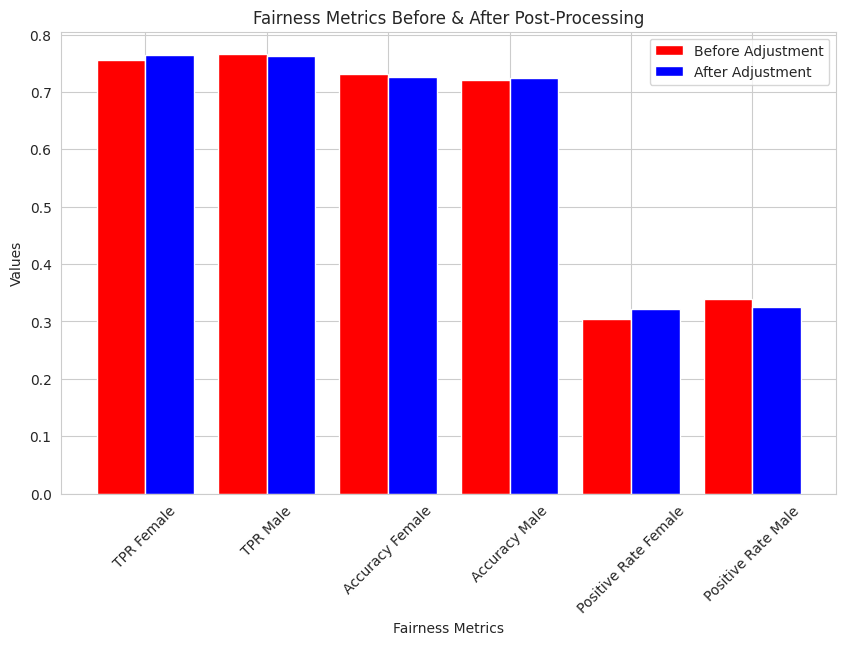

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fairness metrics
metrics_labels = ["TPR Female", "TPR Male", "Accuracy Female", "Accuracy Male", "Positive Rate Female", "Positive Rate Male"]
before_values = [tpr_female, tpr_male, accuracy_female, accuracy_male, positive_rate_female, positive_rate_male]
after_values = [tpr_female_adjusted, tpr_male_adjusted, accuracy_female_adjusted, accuracy_male_adjusted, positive_rate_female_adjusted, positive_rate_male_adjusted]

x = np.arange(len(metrics_labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, before_values, 0.4, label="Before Adjustment", color="red")
plt.bar(x + 0.2, after_values, 0.4, label="After Adjustment", color="blue")

plt.xlabel("Fairness Metrics")
plt.ylabel("Values")
plt.title("Fairness Metrics Before & After Post-Processing")
plt.xticks(ticks=x, labels=metrics_labels, rotation=45)
plt.legend()
plt.show()
